# Workspace setup

In [ ]:
!pip install sdeint

  Preparing metadata (setup.py) ... done
  Created wheel for sdeint: filename=sdeint-0.3.0-py3-none-any.whl size=25903 sha256=887ecab77beb87bc384b3da04961513081a53749d8c115907ec970f80e565774
  Stored in directory: /root/.cache/pip/wheels/f9/85/bb/4d274a94104fc3050d1652321aeb6d18b48b9e3cf752a8b32d
Successfully built sdeint


# Random walk com dado - para aula de Biologia de sistemas

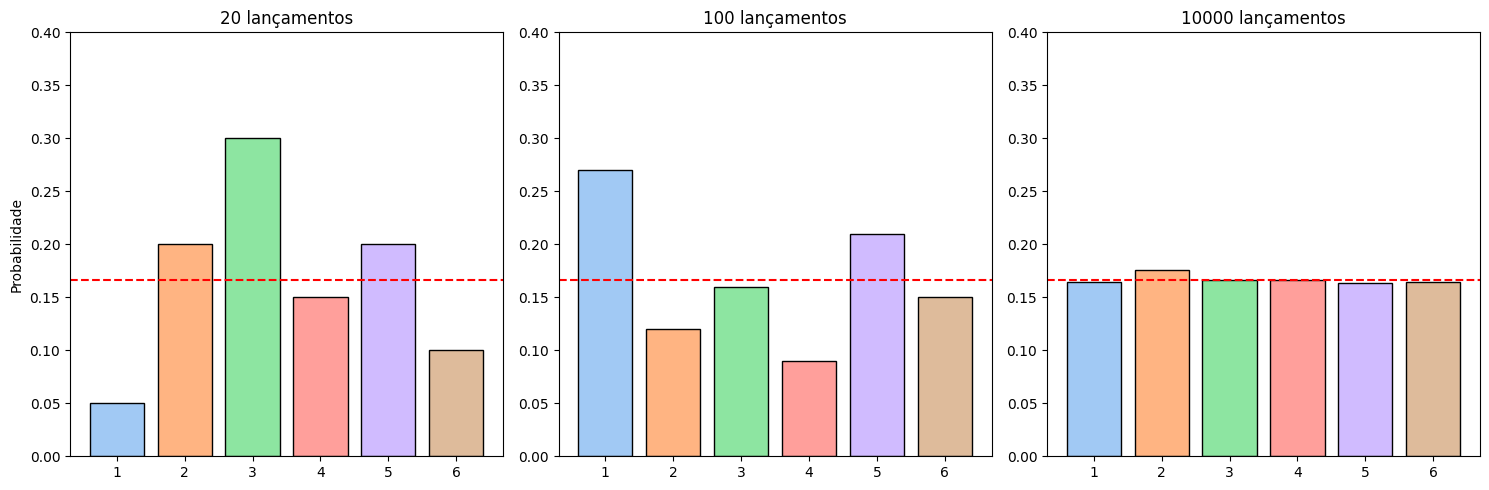

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def simulate_dice_throws(n_throws):
    """Simula o lançamento de um dado e retorna a probabilidade de cada resultado."""
    results = np.random.randint(1, 7, n_throws)  # Gera resultados aleatórios entre 1 e 6
    probabilities = [(results == i).mean() for i in range(1, 7)]  # Calcula a probabilidade para cada número de 1 a 6
    return probabilities

# Simulações
n_throws_list = [20, 100, 10000]
probabilities_list = [simulate_dice_throws(n) for n in n_throws_list]


# Criação dos gráficos
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for ax, n_throws, probabilities in zip(axes, n_throws_list, probabilities_list):
    ax.bar(range(1, 7), probabilities, color=sns.color_palette("pastel"), edgecolor="k")
    ax.set_title(f'{n_throws} lançamentos')
    ax.set_xticks(range(1, 7))
    ax.set_ylim(0, 0.4)  # Define um limite no eixo y para melhor visualização
    ax.axhline(1/6, color='red', linestyle='dashed')  # Linha indicando a probabilidade teórica de 1/6

axes[0].set_ylabel('Probabilidade')
plt.tight_layout()
plt.show()


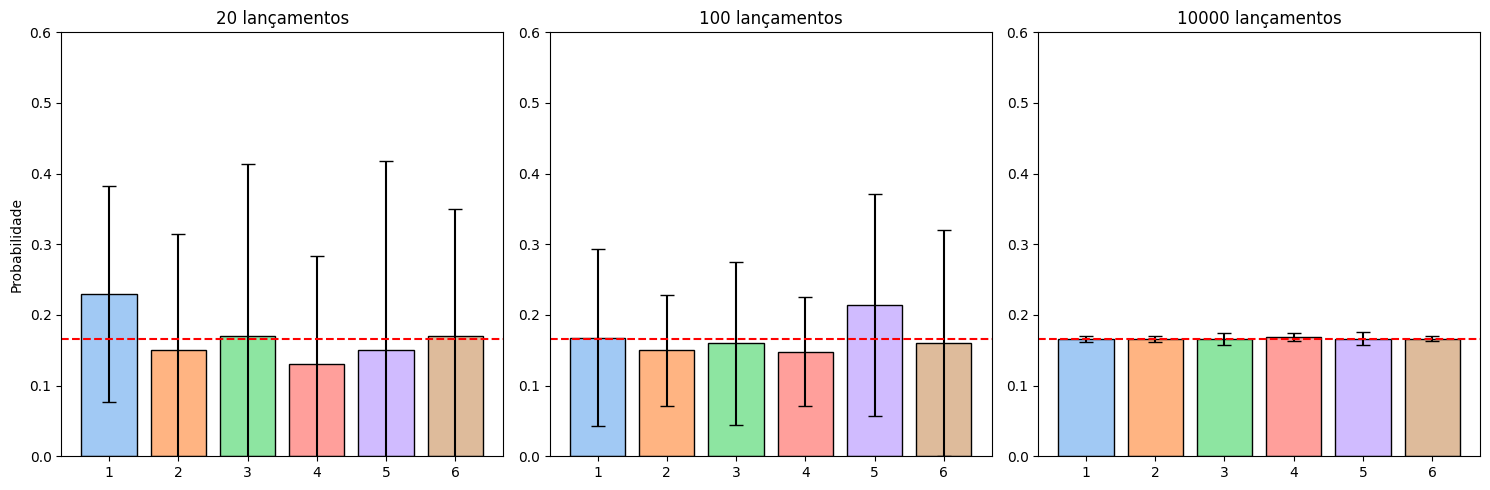

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(3)

def simulate_dice_throws(n_throws, n_samples=5):
    """Simula repetidamente o lançamento de um dado e retorna a média e o desvio padrão das probabilidades."""
    all_probs = np.zeros((n_samples, 6))
    for j in range(n_samples):
        results = np.random.randint(1, 7, n_throws)
        probabilities = [(results == i).mean() for i in range(1, 7)]
        all_probs[j] = probabilities
    mean_probs = all_probs.mean(axis=0)
    std_probs = 3*all_probs.std(axis=0)
    return mean_probs, std_probs

# Simulações
n_throws_list = [20, 100, 10000]
statistics = [simulate_dice_throws(n) for n in n_throws_list]

# Criação dos gráficos
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for ax, n_throws, (mean_probs, std_probs) in zip(axes, n_throws_list, statistics):
    ax.bar(range(1, 7), mean_probs, yerr=std_probs, color=sns.color_palette("pastel"), edgecolor="k", capsize=5)
    ax.set_title(f'{n_throws} lançamentos')
    ax.set_xticks(range(1, 7))
    ax.set_ylim(0, 0.6)  # Define um limite no eixo y para melhor visualização
    ax.axhline(1/6, color='red', linestyle='dashed')  # Linha indicando a probabilidade teórica de 1/6

axes[0].set_ylabel('Probabilidade')
plt.tight_layout()
plt.show()


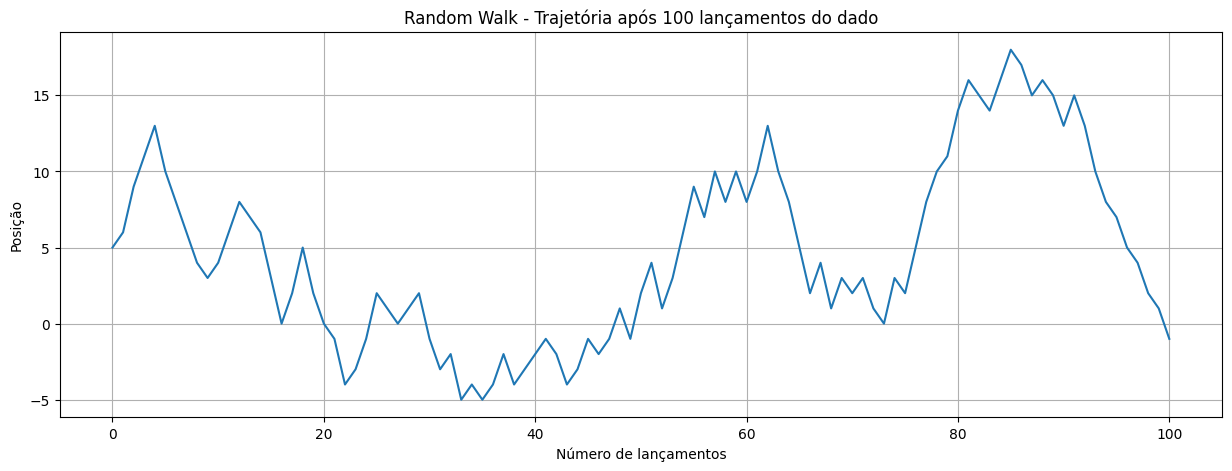

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1234)

# Definindo os valores possíveis do dado
dice_values = [-3, -2, -1, 1, 2, 3]

# Função para realizar um random walk
def random_walk(steps):
    return np.cumsum(np.random.choice(dice_values, steps))

# Função para realizar um random walk começando de um ponto inicial x0
def random_walk_from_x0(steps, x0):
    walk = np.cumsum(np.random.choice(dice_values, steps))
    return walk + x0

# Simulando um random walk de 100 passos
steps = 100
# walk = random_walk(steps)

x0 = 5
walk = random_walk_from_x0(steps, x0)

# Plotando a trajetória
plt.figure(figsize=(15, 5))
plt.plot(np.insert(walk, 0, x0))
# plt.plot(walk)
plt.title("Random Walk - Trajetória após 100 lançamentos do dado")
plt.xlabel("Número de lançamentos")
plt.ylabel("Posição")
plt.grid(True)
plt.show()



In [ ]:
# # Número de simulações
# n_simulations = 10000

# # Coletando as posições finais de muitos random walks
# final_positions = [random_walk(steps)[-1] for _ in range(n_simulations)]

# # Plotando o histograma das posições finais
# plt.figure(figsize=(10, 6))
# plt.hist(final_positions, bins=30, edgecolor="k", alpha=0.7)
# plt.title("Histograma das posições finais após 10.000 random walks de 100 etapas cada")
# plt.xlabel("Posição Final")
# plt.ylabel("Contagem")
# plt.grid(True)
# plt.show()

# def plot_histogram_at_different_times(times, n_simulations=10000):
#     plt.figure(figsize=(12, 6))

#     for t in times:
#         final_positions = [random_walk(t)[-1] for _ in range(n_simulations)]
#         plt.hist(final_positions, bins=30, edgecolor="k", alpha=0.7, label=f"{t} etapas")

#     plt.title("Histograma das posições após 10.000 random walks")
#     plt.xlabel("Posição Final")
#     plt.ylabel("Contagem")
#     plt.grid(True)
#     plt.legend()
#     plt.show()

# # Plotando para diferentes instantes de tempo
# plot_histogram_at_different_times([20, 50, 100])

# import numpy as np
# import matplotlib.pyplot as plt
# import imageio

# def plot_histogram_at_time(t, n_simulations=10000):
#     final_positions = [random_walk(t)[-1] for _ in range(n_simulations)]
#     bin_edges = np.linspace(-8*np.sqrt(100), 8*np.sqrt(100), 31)  # 31 bordas para 30 bins

#     plt.figure(figsize=(10, 6))
#     plt.hist(final_positions, bins=bin_edges, edgecolor="k", alpha=0.7, density=True)

#     plt.title(f"Distribuição de probabilidade das posições após {n_simulations} random walks de {t} etapas")
#     plt.xlabel("Posição Final")
#     plt.ylabel("Densidade de Probabilidade")
#     plt.xlim([-8*np.sqrt(100), 8*np.sqrt(100)])  # fixa o eixo x considerando o maior valor de t que usará
#     # plt.ylim([0, n_simulations*0.35])  # estimativa grosseira para o eixo y
#     plt.ylim([0, 0.1])
#     plt.grid(True)
#     plt.tight_layout()

#     filename = f"histogram_at_{t}_steps.png"
#     plt.savefig(filename)
#     plt.close()

#     return filename

# times = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# filenames = [plot_histogram_at_time(t) for t in times]

# with imageio.get_writer('random_walk_evolution.gif', mode='I', duration=1000) as writer:
#     for filename in filenames:
#         image = imageio.imread(filename)
#         writer.append_data(image)


import numpy as np
import matplotlib.pyplot as plt
import imageio

def random_walk_from_x0(steps, x0):
    walk = np.cumsum(np.random.choice(dice_values, steps))
    return np.insert(walk, 0, x0)  # Insere x0 como o primeiro elemento

dice_values = [-3, -2, -1, 1, 2, 3]

def plot_histogram_at_time(t, x0=5, n_simulations=10000):
    final_positions = [random_walk_from_x0(t, x0)[-1] for _ in range(n_simulations)]
    bin_edges = np.linspace(-8*np.sqrt(100), 8*np.sqrt(100), 31)  # 31 bordas para 30 bins

    plt.figure(figsize=(10, 6))
    plt.hist(final_positions, bins=bin_edges, edgecolor="k", alpha=0.7, density=True)

    plt.title(f"Distribuição de probabilidade das posições após {n_simulations} random walks de {t} etapas partindo de om x0={x0}")
    plt.xlabel("Posição Final")
    plt.ylabel("Densidade de Probabilidade")
    plt.xlim([-8*np.sqrt(100), 8*np.sqrt(100)])
    plt.ylim([0, 0.1])
    plt.grid(True)
    plt.tight_layout()

    filename = f"histogram_at_{t}_steps_from_x0_{x0}.png"
    plt.savefig(filename)
    plt.close()

    return filename

times = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
x0 = 5  # ponto de partida inicial
filenames = [plot_histogram_at_time(t, x0) for t in times]

with imageio.get_writer('random_walk_evolution_from_x0.gif', mode='I', duration=1) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)




<ipython-input-8-26b35003c6c3>:105: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


# SSA - Versão inicial

[[-1  1  0]
 [ 0 -1  1]
 [ 1  0 -1]]


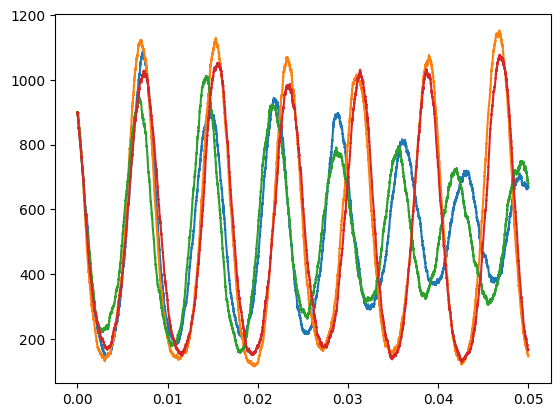

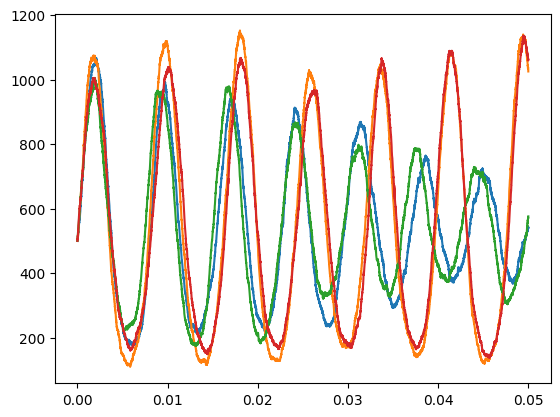

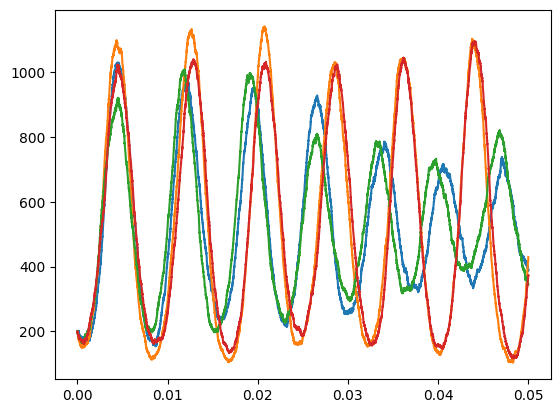

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x0 = [900, 500, 200]

M = np.array([[[1, 1, 0], [0, 2, 0]],
              [[0, 1, 1], [0, 0, 2]],
              [[1, 0, 1], [2, 0, 0]]])

c = [1, 1, 1]

Nu = np.array([[M[i0][1][j0] - M[i0][0][j0] for j0 in range(M.shape[0])] for i0 in range(M.shape[0])])

print(Nu)

def h(vec, j):
    return np.prod([vec[i] if M[j][0][i] != 0 else 1 for i in range(len(vec))])

xs1 = []
xs2 = []
xs3 = []

def sim():
    for run in range(4):
        a = [0, 0, 0]
        x1 = [[0, x0[0]]]
        x2 = [[0, x0[1]]]
        x3 = [[0, x0[2]]]
        Tmax = 0.05
        t = 0
        x = x0.copy()
        L = len(M)

        while t < Tmax:
            a0 = 0
            for nreac in range(L):
                aj = c[nreac] * h(x, nreac)
                a[nreac] = aj
                a0 += aj

            r1 = np.random.random()
            r2 = np.random.random()
            mu = 0
            while sum(a[:mu+1]) < (a0 * r1):
                mu += 1
            tau = -np.log(r2)/a0
            x = [x[i] + Nu[mu][i] for i in range(len(x))]
            t += tau
            x1.append([t, x[0]])
            x2.append([t, x[1]])
            x3.append([t, x[2]])

        xs1.append(x1)
        xs2.append(x2)
        xs3.append(x3)

sim()

# Plotting the data
for x in xs1:
    plt.plot(*zip(*x))
plt.show()

for x in xs2:
    plt.plot(*zip(*x))
plt.show()

for x in xs3:
    plt.plot(*zip(*x))
plt.show()


# SSA - tentando otimzar ... acho que esta errado

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

x0 = np.array([900, 500, 200])

M = np.array([[[1, 1, 0], [0, 2, 0]],
              [[0, 1, 1], [0, 0, 2]],
              [[1, 0, 1], [2, 0, 0]]])

c = np.array([1, 1, 1])
L = len(M)

Nu = M[:, 1] - M[:, 0]

def h(vec, j):
    return np.prod(np.where(M[j, 0] != 0, vec, 1))

def sim(n):
    all_trajectories = [[[] for _ in range(n)] for _ in range(3)]

    for k in range(n):
        a = np.zeros(L)
        x = x0.copy()
        t = 0

        while t < 0.5:
            aj = c * np.array([h(x, nreac) for nreac in range(L)])
            a0 = np.sum(aj)

            r1, r2 = np.random.random(2)
            mu = np.searchsorted(np.cumsum(aj), a0 * r1)
            tau = -np.log(r2) / a0

            x += Nu[mu]
            t += tau

            for i in range(3):
                all_trajectories[i][k].append(x[i])

    return all_trajectories

all_trajectories = sim(4)

# # Plot histograms for the last time point
# plt.figure(figsize=(15, 5))

# for i, species in enumerate(["A", "B", "C"], 1):
#     plt.subplot(1, 3, i)
#     plt.hist([trajectory[-1] for trajectory in all_trajectories[i-1]], bins=30, alpha=0.7)
#     plt.title(f"Distribution of {species} at final time point")

# plt.tight_layout()
# plt.show()

<ipython-input-4-6c3003f4ce6d>:34: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -np.log(r2) / a0


In [ ]:
min_length = min([len(trajectory) for trajectories in all_trajectories for trajectory in trajectories])

print(min_length)

6667


In [ ]:
import os

# Directory for storing PNG files
if not os.path.exists("histograms"):
    os.mkdir("histograms")

# Determine the number of time intervals
min_length = min([len(trajectory) for trajectories in all_trajectories for trajectory in trajectories])

# Determine global x and y limits
all_values = [value for trajectories in all_trajectories for trajectory in trajectories for value in trajectory]
x_limits = (min(all_values), max(all_values))
y_limits = (0, 0.03)  # A estimativa aproximada, ajuste conforme necessário

# Choose intervals to capture histograms (for example, every 10th interval)
step = max(min_length // 50, 1)  # This ensures we don't create more than 20 PNG files

bin_edges = np.linspace(0, 1200, 31)  # 30 bins entre 0 e 1000

for t in range(0, min_length, step):
    plt.figure(figsize=(15, 5))

    for i, species in enumerate(["A", "B", "C"], 1):
        plt.subplot(1, 3, i)
        plt.hist([trajectory[t] for trajectory in all_trajectories[i-1]], bins=bin_edges, alpha=0.7, density=True)
        plt.xlim(x_limits)
        plt.ylim(y_limits)
        plt.title(f"Distribuição da espécie {species} no passo {t}")

    plt.tight_layout()
    plt.savefig(f"histograms/histogram_{t}.png")
    plt.close()

# Compile the images into a GIF
import imageio

with imageio.get_writer('distribution_evolution.gif', mode='I', duration=0.5) as writer:
    for t in range(0, min_length, step):
        image = imageio.imread(f"histograms/histogram_{t}.png")
        writer.append_data(image)



<ipython-input-26-b460ec9417f1>:39: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f"histograms/histogram_{t}.png")


In [ ]:
import imageio

with imageio.get_writer('distribution_evolution.gif', mode='I', duration=0.5) as writer:
    for t in range(0, min_length, step):
        image = imageio.imread(f"histograms/histogram_{t}.png")
        writer.append_data(image)


<ipython-input-27-3ff6b0fe0e05>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f"histograms/histogram_{t}.png")


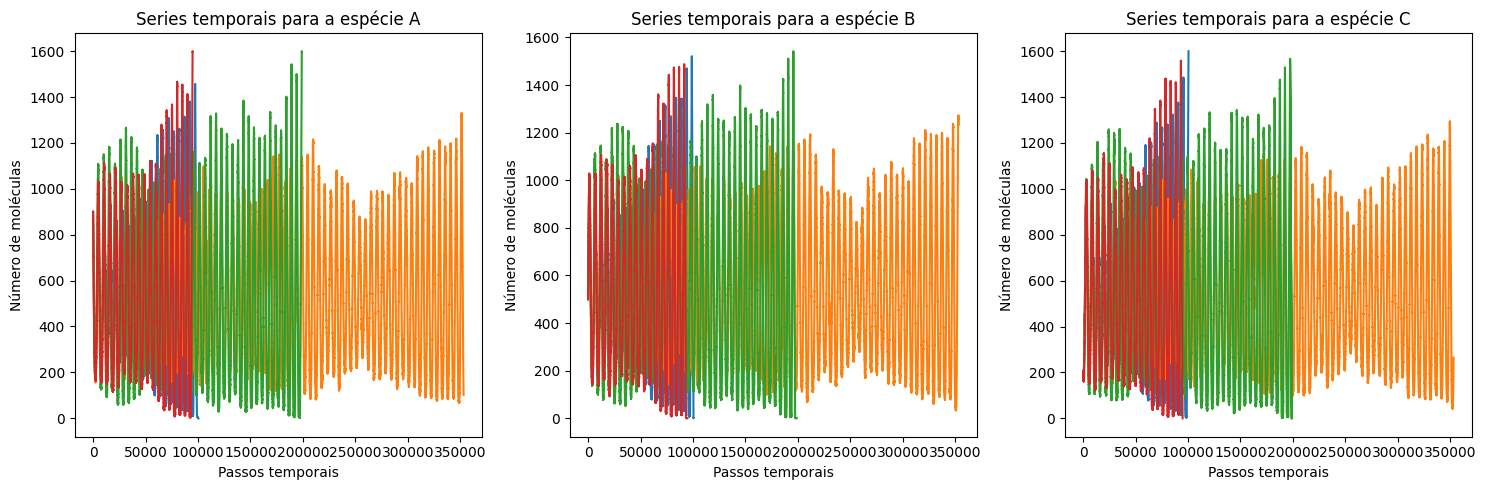

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Série Temporal
plt.figure(figsize=(15, 5))

for idx, species in enumerate(["A", "B", "C"], 1):
    plt.subplot(1, 3, idx)

    for trajectory in all_trajectories[idx-1]:
        plt.plot(trajectory, label=f"Trajectory {idx}")

    plt.title(f"Series temporais para a espécie {species}")
    plt.xlabel("Passos temporais")
    plt.ylabel("Número de moléculas")

plt.tight_layout()
plt.show()

# # Trajetória no Espaço de Fases
# fig = plt.figure(figsize=(14, 14))
# ax = fig.add_subplot(111, projection='3d')

# for traj_x1, traj_x2, traj_x3 in zip(all_trajectories[0], all_trajectories[1], all_trajectories[2]):
#     ax.plot(traj_x1, traj_x2, traj_x3)

# ax.set_xlabel('A')
# ax.set_ylabel('B')
# ax.set_zlabel('C')
# ax.set_title("Trajetória no espaço de fase")

# # fig.subplots_adjust(left=10.7, right=10.75, top=10.75, bottom=10.7)

# plt.show()


# SSA salvando o tempo

In [ ]:
import time

def measure_execution_time(n_simulations):
    start_time = time.time()

    # Execute a simulação n vezes vez para medir o tempo de execução de uma única simulação
    n = 4
    _ = sim(n)

    single_simulation_time = ( time.time() - start_time )/n

    print(f"Tempo de execução para uma simulação: {single_simulation_time:.4f} segundos.")
    print(f"Tempo projetado para {n_simulations} simulações: {single_simulation_time * n_simulations:.4f} segundos.")

    return single_simulation_time * n_simulations

# Use a função para medir e projetar o tempo de execução
projected_time = measure_execution_time(200)

Tempo de execução para uma simulação: 4.1764 segundos.
Tempo projetado para 200 simulações: 835.2865 segundos.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# np.random.seed(123)

# x0 = np.array([350, 350, 200])
# x0 = np.array([700, 700, 400])
x0 = np.array([900, 500, 200])

def initialize_reactions():
    M = np.array([[[1, 1, 0], [0, 2, 0]],
                  [[0, 1, 1], [0, 0, 2]],
                  [[1, 0, 1], [2, 0, 0]]])
    c = np.array([1, 1, 1])
    L = len(M)
    Nu = M[:, 1] - M[:, 0]
    Nu = np.vstack([Nu, [0, 0, 0]]) ########### novo
    return M, c, L, Nu

def h(vec, j, M):
    return np.prod(np.where(M[j, 0] != 0, vec, 1))

def sim(n):

    M, c, L, Nu = initialize_reactions()   ########### novo

    aDefault = c * np.array([h(x0, nreac, M) for nreac in range(L)]) ########### novo
    tauDefault = -np.log(np.random.random(1)) / np.sum(aDefault) ########### novo

    xs1 = []
    xs2 = []
    xs3 = []

    Tmax = 0.1
    # Tmax = 1

    for _ in range(n):

        # M, c, L, Nu = initialize_reactions()

        x_traj1 = [(0, x0[0])]
        x_traj2 = [(0, x0[1])]
        x_traj3 = [(0, x0[2])]

        t = 0
        x = x0.copy()

        while t < Tmax:

            # if len(M) == 0:  # Se todas as reações foram removidas
            #     while t < Tmax:
            #         tau = 0.001  # Incremento de tempo pequeno; você pode ajustar isso conforme necessário
            #         t += tau
            #         x_traj1.append((t, x[0]))
            #         x_traj2.append((t, x[1]))
            #         x_traj3.append((t, x[2]))
            #     break

            a = c * np.array([h(x, nreac, M) for nreac in range(L)])
            a0 = np.sum(a)

            # Essa é a forma mais eficiente!!
            # if a0 == 0:  # Se nenhuma reação for possível
            #     while t < Tmax:
            #         tau = 0.001  # Incremento de tempo pequeno; você pode ajustar isso conforme necessário
            #         t += tau
            #         x_traj1.append((t, x[0]))
            #         x_traj2.append((t, x[1]))
            #         x_traj3.append((t, x[2]))
            #     break

            r1, r2 = np.random.random(2)
            # mu = np.searchsorted(np.cumsum(a), a0 * r1)

            # if np.all(x + Nu[mu] >= 0):
            #     tau = -np.log(r2) / a0
            #     x += Nu[mu]
            # else:
            #     # Removendo a reação que não pode ocorrer
            #     M = np.delete(M, mu, 0)
            #     c = np.delete(c, mu)
            #     L -= 1
            #     Nu = np.delete(Nu, mu, 0)
            #     # Como a propensão a e a taxa total a0 vão mudar com a remoção da reação, é importante recalcular antes da próxima iteração
            #     continue

            ########### novo
            if a0 > 0:
                mu = np.searchsorted(np.cumsum(a), a0 * r1)
                tau = -np.log(r2) / a0
            else:
                mu = -1
                tau = tauDefault

            x += Nu[mu] ########### novo

            t += tau

            x_traj1.append((t, x[0]))
            x_traj2.append((t, x[1]))
            x_traj3.append((t, x[2]))

        xs1.append(x_traj1)
        xs2.append(x_traj2)
        xs3.append(x_traj3)

    return xs1, xs2, xs3



In [ ]:
xs1, xs2, xs3 = sim(10)

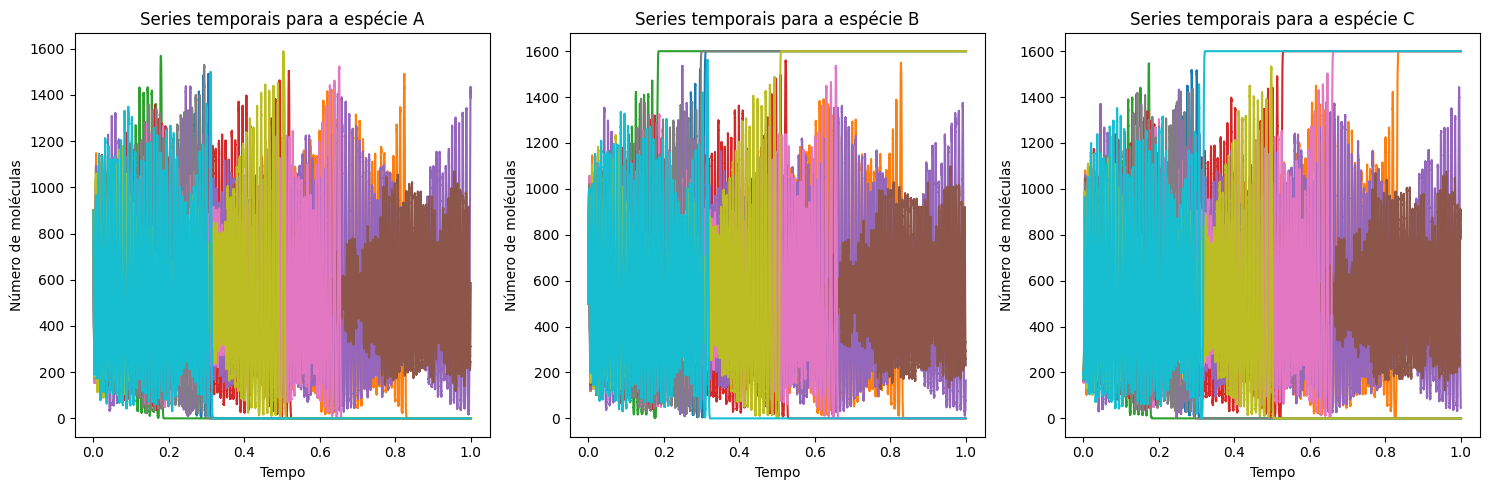

In [ ]:
plt.figure(figsize=(15, 5))

all_species = [xs1, xs2, xs3]
speciesnames = ["A", "B", "C"]

for idx, species in enumerate(all_species, 1):
    plt.subplot(1, 3, idx)

    for trajectory in species:
        times, values = zip(*trajectory)  # Separa tempos e valores
        plt.plot(times, values)

    plt.title(f"Series temporais para a espécie {speciesnames[idx-1]}")
    plt.xlabel("Tempo")
    plt.ylabel("Número de moléculas")

plt.tight_layout()
plt.show()

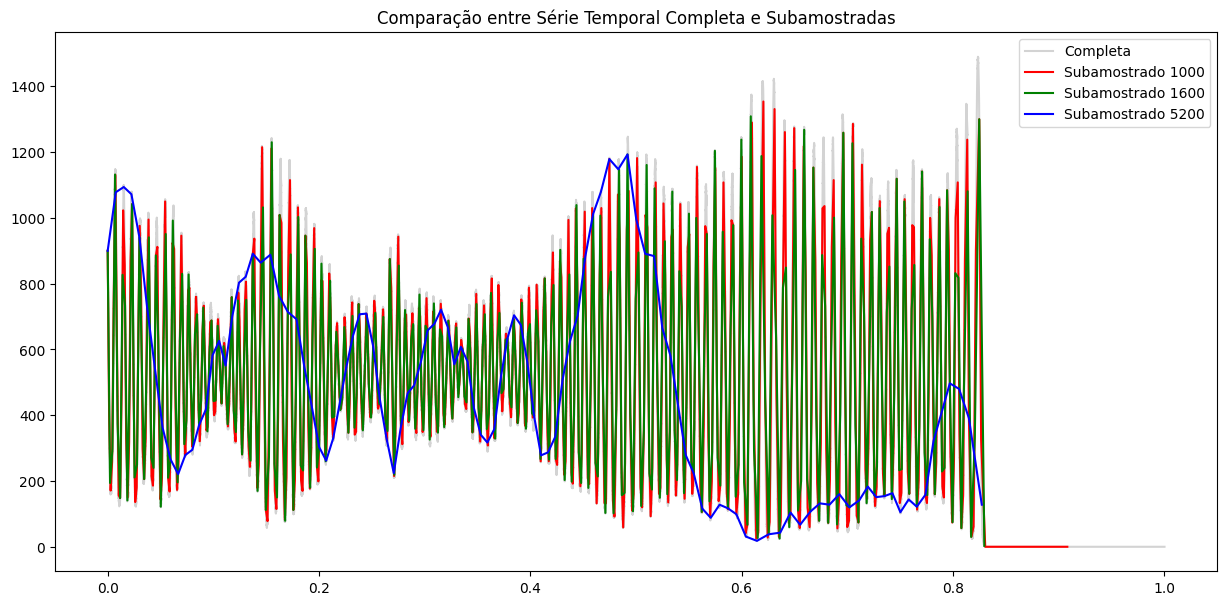

In [ ]:
plt.figure(figsize=(15, 7))

# Plotar a série temporal completa em uma cor de fundo (por exemplo, cinza claro) para servir como referência.
plt.plot([x[0] for x in xs1[1]], [x[1] for x in xs1[1]], color='lightgray', label='Completa')

# Superpor as séries temporais subamostradas em cores diferentes.
intervalos = [1000, 1600, 5200]
cores = ['red', 'green', 'blue']

for intervalo, cor in zip(intervalos, cores):
    plt.plot([x[0] for x in xs1[1][::intervalo]], [x[1] for x in xs1[1][::intervalo]], color=cor, label=f'Subamostrado {intervalo}')

plt.title('Comparação entre Série Temporal Completa e Subamostradas')
plt.legend()
plt.show()


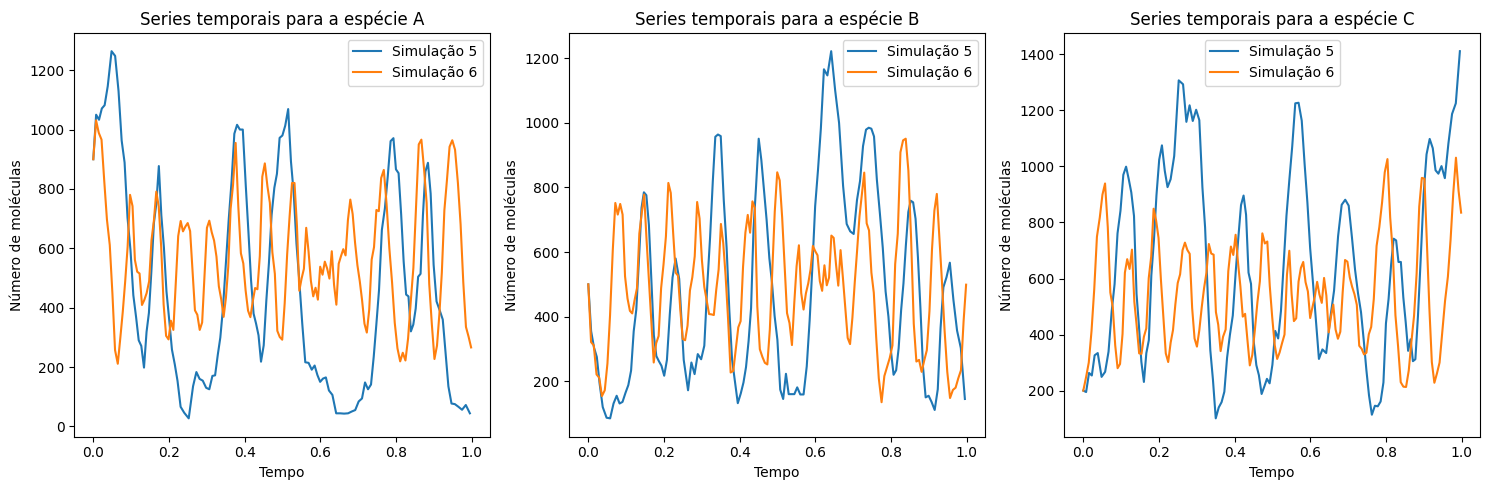

In [ ]:
plt.figure(figsize=(15, 5))

all_species = [xs1, xs2, xs3]
speciesnames = ["A", "B", "C"]
N = 5200  # Subsample every N points. Adjust this value as needed.
repetitions_indices = [4, 5] # 0, 1, 2, 3, 6, 7, 8, 9

for idx, species in enumerate(all_species, 1):
    plt.subplot(1, 3, idx)

    # for trajectory in species:
    for index in repetitions_indices:
        trajectory = species[index]
        times, values = zip(*trajectory)  # Separa tempos e valores
        subsampled_times = times[::N]
        subsampled_values = values[::N]
        plt.plot(subsampled_times, subsampled_values, label=f"Simulação {index + 1}")

    plt.title(f"Series temporais para a espécie {speciesnames[idx-1]}")
    plt.xlabel("Tempo")
    plt.ylabel("Número de moléculas")
    plt.legend()

plt.tight_layout()
plt.show()


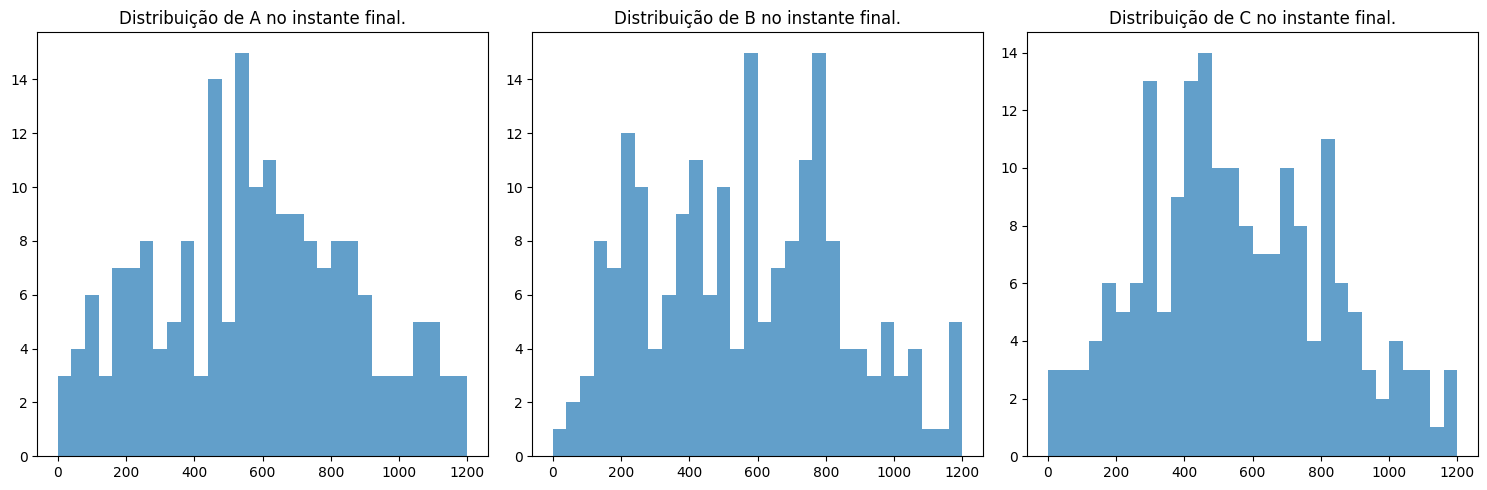

In [ ]:
# Plot histograms for the last time point
plt.figure(figsize=(15, 5))

all_trajectories = [xs1, xs2, xs3]

bin_edges = np.linspace(0, 1200, 31)

for i, species in enumerate(["A", "B", "C"], 1):
    plt.subplot(1, 3, i)
    # Extract the species count at the last time point for each trajectory
    final_counts = [trajectory[-1][1] for trajectory in all_trajectories[i-1]]
    plt.hist(final_counts, bins=bin_edges, alpha=0.7)
    plt.title(f"Distribuição de {species} no instante final.")

plt.tight_layout()
plt.show()

In [ ]:
import os

all_trajectories = [xs1, xs2, xs3]

# Directory for storing PNG files
if not os.path.exists("histograms"):
    os.mkdir("histograms")

# Determine the maximum time across all trajectories
max_time = max([trajectory[-1][0] for trajectories in all_trajectories for trajectory in trajectories])
# Tmax = 0.1
# max_time = Tmax

# Determine global x and y limits
all_values = [value[1] for trajectories in all_trajectories for trajectory in trajectories for value in trajectory]
x_limits = (min(all_values), max(all_values))
y_limits = (0, 0.03)  # A estimativa aproximada, ajuste conforme necessário

# Create a time grid
n_intervals = 50
time_intervals = np.linspace(0, max_time, n_intervals)

bin_edges = np.linspace(0, 1200, 31)  # 30 bins entre 0 e 1200

for t in time_intervals:
    plt.figure(figsize=(15, 5))

    for i, species in enumerate(["A", "B", "C"], 1):
        plt.subplot(1, 3, i)
        # Extract the species count closest to the time interval t for each trajectory
        values_at_t = [next((value[1] for value in trajectory if value[0] >= t), trajectory[-1][1]) for trajectory in all_trajectories[i-1]]
        plt.hist(values_at_t, bins=bin_edges, alpha=0.7, density=True)
        plt.xlim(x_limits)
        plt.ylim(y_limits)
        plt.title(f"Distribuição da espécie {species} no tempo {t:.3f}")

    plt.tight_layout()
    plt.savefig(f"histograms/histogram_{t:.3f}.png")
    plt.close()

import imageio

# Compile the images into a GIF
with imageio.get_writer('distribution_evolution.gif', mode='I', duration=0.5) as writer:
    for t in time_intervals:
        image = imageio.imread(f"histograms/histogram_{t:.3f}.png")
        writer.append_data(image)

<ipython-input-6-18a76807e697>:46: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f"histograms/histogram_{t:.3f}.png")


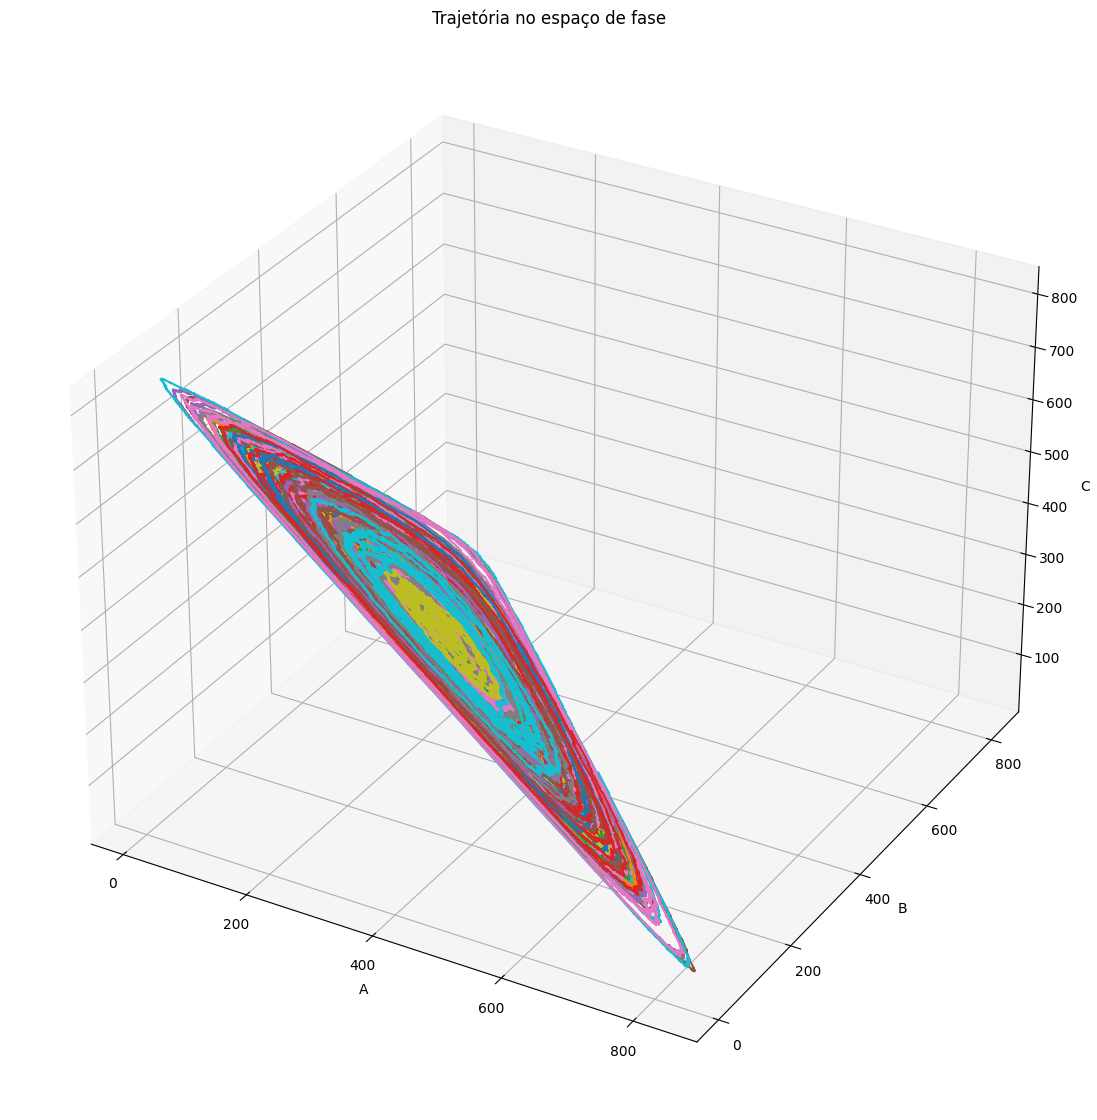

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Criando a figura e o eixo 3D
fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(111, projection='3d')

# Loop para traçar cada trajetória no espaço de fases
for traj_A, traj_B, traj_C in zip(all_trajectories[0], all_trajectories[1], all_trajectories[2]):
    # Extraindo apenas os valores de cada trajetória
    x1_values = [value[1] for value in traj_A]
    x2_values = [value[1] for value in traj_B]
    x3_values = [value[1] for value in traj_C]

    ax.plot(x1_values, x2_values, x3_values)

ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('C')
ax.set_title("Trajetória no espaço de fase")

plt.show()


In [ ]:
# histogramas para os passos
import matplotlib.pyplot as plt
import os

# Directory for storing PNG files
if not os.path.exists("histograms"):
    os.mkdir("histograms")

# Determine the number of time intervals
min_length = min([len(trajectory) for trajectories in all_trajectories for trajectory in trajectories])

# Determine global x and y limits
all_values = [value for trajectories in all_trajectories for trajectory in trajectories for value in trajectory]
x_limits = (min(all_values), max(all_values))
y_limits = (0, 0.03)  # A estimativa aproximada, ajuste conforme necessário

# Choose intervals to capture histograms (for example, every 10th interval)
step = max(min_length // 50, 1)  # This ensures we don't create more than 20 PNG files

bin_edges = np.linspace(0, 1200, 31)  # 30 bins entre 0 e 1000

for t in range(0, min_length, step):
    plt.figure(figsize=(15, 5))

    for i, species in enumerate(["A", "B", "C"], 1):
        plt.subplot(1, 3, i)
        plt.hist([trajectory[t] for trajectory in all_trajectories[i-1]], bins=bin_edges, alpha=0.7, density=True)
        plt.xlim(x_limits)
        plt.ylim(y_limits)
        plt.title(f"Distribuição da espécie {species} no passo {t}")

    plt.tight_layout()
    plt.savefig(f"histograms/histogram_{t}.png")
    plt.close()

# Compile the images into a GIF
import imageio

with imageio.get_writer('distribution_evolution.gif', mode='I', duration=0.5) as writer:
    for t in range(0, min_length, step):
        image = imageio.imread(f"histograms/histogram_{t}.png")
        writer.append_data(image)

# Série Temporal - com passos e não tempo rs
plt.figure(figsize=(15, 5))

for idx, species in enumerate(["A", "B", "C"], 1):
    plt.subplot(1, 3, idx)

    for trajectory in all_trajectories[idx-1]:
        plt.plot(trajectory, label=f"Trajectory {idx}")

    plt.title(f"Series temporais para a espécie {species}")
    plt.xlabel("Passos temporais")
    plt.ylabel("Número de moléculas")

plt.tight_layout()
plt.show()

# Langevin

<ipython-input-21-54763674a5ff>:25: RuntimeWarning: invalid value encountered in sqrt
  sigma_A1 = np.sqrt(k1 * A * B)
<ipython-input-21-54763674a5ff>:28: RuntimeWarning: invalid value encountered in sqrt
  sigma_B1 = np.sqrt(k1 * A * B)
<ipython-input-21-54763674a5ff>:29: RuntimeWarning: invalid value encountered in sqrt
  sigma_B2 = np.sqrt(k2 * B * C)
<ipython-input-21-54763674a5ff>:31: RuntimeWarning: invalid value encountered in sqrt
  sigma_C1 = np.sqrt(k1 * A * B)
<ipython-input-21-54763674a5ff>:32: RuntimeWarning: invalid value encountered in sqrt
  sigma_C2 = np.sqrt(k2 * B * C)


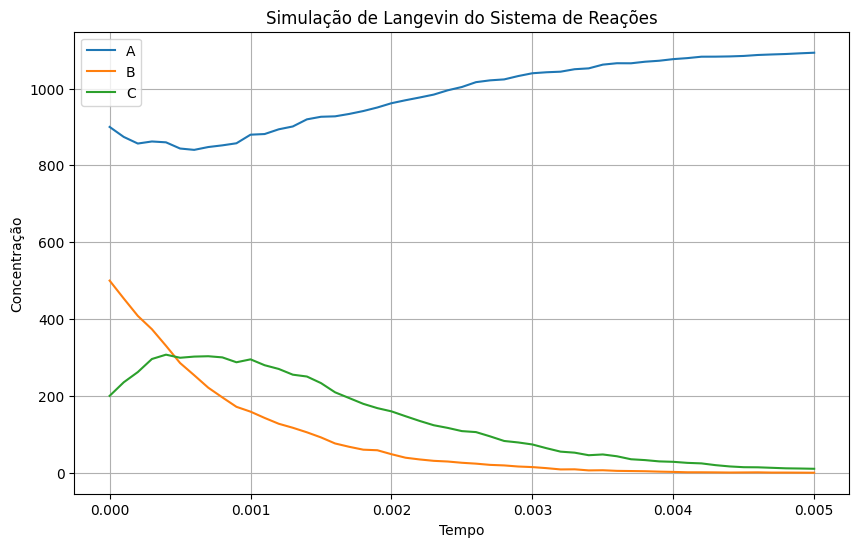

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sdeint

# Parâmetros das reações
k1 = 1
k2 = 1
k3 = 1

# Função drift para o sistema químico
def reactions_drift():
    def func(X, t):
        A, B, C = X
        dA = -k1 * A * B + k3 * A * C
        dB = -k1 * A * B - k2 * B * C
        dC = k1 * A * B +  k2 * B * C - k3 * A * C
        return np.array([dA, dB, dC])
    return func

# Função diffusion para o sistema químico
def reactions_diffusion():
    def func(X, t):
        A, B, C = X

        sigma_A1 = np.sqrt(k1 * A * B)
        sigma_A3 = np.sqrt(k3 * A * C)

        sigma_B1 = np.sqrt(k1 * A * B)
        sigma_B2 = np.sqrt(k2 * B * C)

        sigma_C1 = np.sqrt(k1 * A * B)
        sigma_C2 = np.sqrt(k2 * B * C)
        sigma_C3 = np.sqrt(k3 * A * C)

        G = np.array([
            [sigma_A1, 0, -sigma_A3],
            [sigma_B1, sigma_B2, 0],
            [sigma_C1, sigma_C2, -sigma_C3]
        ])

        return G

    return func

def simulate(T=1, dt=0.0001):
    time = np.linspace(0, T, int(T/dt))
    Y0 = np.array([900.0, 500.0, 200.0])
    result = sdeint.itoint(reactions_drift(), reactions_diffusion(), Y0, time)
    return result, time

# Simulação
result, time = simulate()
A_vals = result[:, 0]
B_vals = result[:, 1]
C_vals = result[:, 2]

plt.figure(figsize=(10,6))
plt.plot(time, A_vals, label="A")
plt.plot(time, B_vals, label="B")
plt.plot(time, C_vals, label="C")
plt.legend()
plt.xlabel("Tempo")
plt.ylabel("Concentração")
plt.title("Simulação de Langevin do Sistema de Reações")
plt.grid(True)
plt.show()


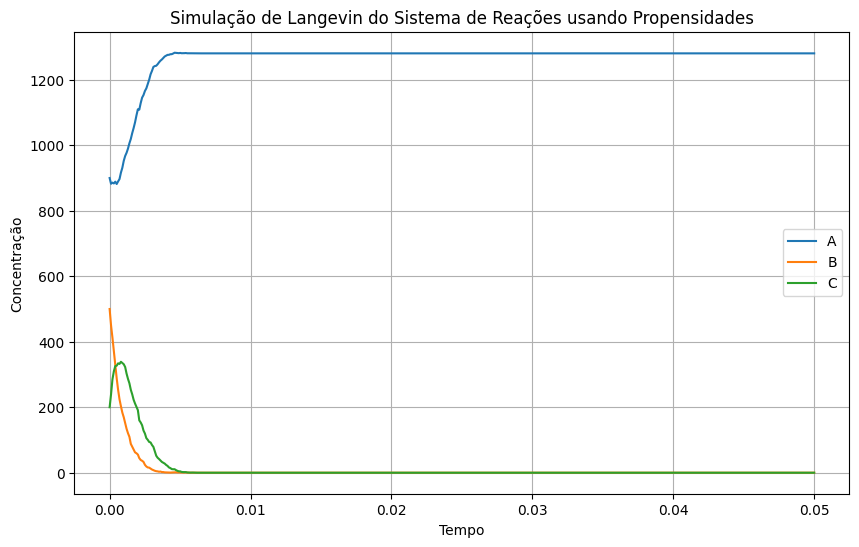

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sdeint

# Função drift para o sistema químico baseado nas propensidades
def reactions_drift():
    def func(X, t):
        A, B, C = X

        # Propensidades
        a1 = max(A * B, 0)
        a2 = max(B * C, 0)
        a3 = max(A * C, 0)

        dA = -a1 + a3
        dB = -a1 - a2
        dC = a1 + a2 - a3

        return np.array([dA, dB, dC])
    return func

# Função diffusion para o sistema químico baseado nas propensidades
def reactions_diffusion():
    def func(X, t):
        A, B, C = X

        # Propensidades
        a1 = max(A * B, 0)
        a2 = max(B * C, 0)
        a3 = max(A * C, 0)

        sigma_A1 = np.sqrt(a1)
        sigma_A3 = np.sqrt(a3)

        sigma_B1 = np.sqrt(a1)
        sigma_B2 = np.sqrt(a2)

        sigma_C1 = np.sqrt(a1)
        sigma_C2 = np.sqrt(a2)
        sigma_C3 = np.sqrt(a3)

        G = np.array([
            [sigma_A1, 0, -sigma_A3],
            [sigma_B1, sigma_B2, 0],
            [sigma_C1, sigma_C2, -sigma_C3]
        ])

        return G

    return func

def simulate(T=0.05, dt=0.0001):
    time = np.linspace(0, T, int(T/dt))
    Y0 = np.array([900.0, 500.0, 200.0])
    result = sdeint.itoint(reactions_drift(), reactions_diffusion(), Y0, time)
    return result, time

# Simulação
result, time = simulate()
A_vals = result[:, 0]
B_vals = result[:, 1]
C_vals = result[:, 2]

plt.figure(figsize=(10,6))
plt.plot(time, A_vals, label="A")
plt.plot(time, B_vals, label="B")
plt.plot(time, C_vals, label="C")
plt.legend()
plt.xlabel("Tempo")
plt.ylabel("Concentração")
plt.title("Simulação de Langevin do Sistema de Reações usando Propensidades")
plt.grid(True)
plt.show()


<ipython-input-39-fdff6b7430d2>:56: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


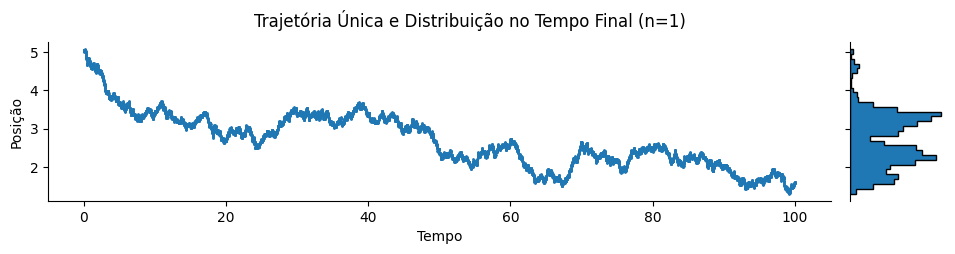

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sdeint

# Brownian motion centered at x0=5
def brownian_motion(sigma):
    def func(X, t):
        return np.array([0]) # Não há drift no movimento browniano simples.
    return func

def noise_intensity(sigma):
    def func(X, t):
        return np.diag([sigma])
    return func

def simulate(sigma, T=100, dt=0.01):
    time = np.linspace(0, T, int(T/dt))
    X0 = np.array([5.0])

    # Obtain the specific function instances with the given parameter
    f = brownian_motion(sigma)
    G = noise_intensity(sigma)

    result = sdeint.itoint(f, G, X0, time)
    x = result[:, 0]
    return x, time

# Parameters and simulation
sigma = 0.2
# time = np.linspace(0, 100, int(100/0.01))
x, time = simulate(sigma)

# First, initiate a JointGrid with the data
g = sns.JointGrid(x=time, y=x, height=6, ratio=7)
g.fig.set_figwidth(10)
g.fig.set_figheight(2)

# Plot the scatter plot on the joint axis of the grid
g = g.plot_joint(plt.scatter, s=1)
# Add the horizontal histogram for the y-axis
g.ax_marg_y.hist(x, bins=30, histtype="stepfilled", align="mid", orientation="horizontal", color=sns.color_palette()[0], edgecolor="k")
# Remove the x-axis histogram
g.ax_marg_x.remove()

plt.suptitle('Trajetória Única e Distribuição no Tempo Final (n=1)', y=1.02)
plt.xlabel('Tempo')
plt.ylabel('Posição')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sdeint

# Brownian motion with deterministic drag centered at x0=5
def brownian_motion_with_drag(sigma, lambda_drag):
    def func(X, t):
        x = X[0]
        drift = -lambda_drag * x
        return np.array([drift])
    return func

def noise_intensity(sigma):
    def func(X, t):
        return np.diag([sigma])
    return func

def simulate(sigma, lambda_drag, T=30, dt=0.01):
    time = np.linspace(0, T, int(T/dt))
    X0 = np.array([10.0])

    # Obtain the specific function instances with the given parameter
    f = brownian_motion_with_drag(sigma, lambda_drag)
    G = noise_intensity(sigma)

    result = sdeint.itoint(f, G, X0, time)
    x = result[:, 0]
    return x, time

# Parameters
sigma = 0.3
lambda_drag = 0.05

# Number of simulations
n = 1000
tmax =100
dt = 0.01
all_simulations = [simulate(sigma, lambda_drag, tmax, dt) for _ in range(n)]

# Example: plotting a subset of the trajectories
for i in range(min(10, n)):  # Just taking the first 10 as an example
    x, time = all_simulations[i]
    plt.plot(time, x, lw=0.5)

plt.title(f'Primeiras 10 trajetórias de {n} simulações')
plt.xlabel('Tempo')
plt.ylabel('Posição')
plt.tight_layout()
plt.show()

# If you want to visualize the distribution at the end of all simulations
end_positions = [x[-1] for x, _ in all_simulations]
plt.hist(end_positions, bins=100, edgecolor="k")
plt.title(f'Distribuição das posições finais de {n} simulações')
plt.xlabel('Posição')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()



In [ ]:
import os
import imageio

# Para armazenar PNGs
if not os.path.exists("histograms"):
    os.mkdir("histograms")

# Determine os limites globais de x e y
all_values = [x for xs, _ in all_simulations for x in xs]
x_limits = (min(all_values), max(all_values))

# Cria um intervalo de tempo com 50 pontos ao longo de tmax
n_frames = 100
time_intervals = np.linspace(0, tmax, n_frames)
# indices_to_sample = [(int(t/dt) - 1) for t in time_intervals]  # Subtrair 1 aqui para evitar o erro
indices_to_sample = [(int(t/dt) if t != 0 else 0) for t in time_intervals]

bin_edges = np.linspace(x_limits[0], x_limits[1], 101)  # 30 bins

# Vamos calcular os histogramas para todos os intervalos de tempo primeiro
all_histograms = [np.histogram([xs[idx] for xs, _ in all_simulations], bins=bin_edges, density=True)[0] for idx in indices_to_sample]
max_y = max([max(hist) for hist in all_histograms]) + 0.01
y_limits = (0, max_y)

for idx in indices_to_sample:
    t = (idx + 1) * dt
    plt.figure(figsize=(10, 5))
    values_at_t = [xs[idx] for xs, _ in all_simulations]
    plt.hist(values_at_t, bins=bin_edges, alpha=0.7, density=True, edgecolor="k")
    plt.xlim(x_limits)
    plt.ylim(y_limits)
    plt.title(f"Distribuição da posição no tempo {t:.2f}")
    plt.tight_layout()
    plt.savefig(f"histograms/histogram_{t:.2f}.png")
    plt.close()

# Compile as imagens em um GIF
with imageio.get_writer('distribution_evolution.gif', mode='I', duration=0.5) as writer:
    for idx in indices_to_sample:
        t = (idx + 1) * dt
        image = imageio.imread(f"histograms/histogram_{t:.2f}.png")
        writer.append_data(image)

# Deletando os PNGs após o GIF estar pronto
for idx in indices_to_sample:
    t = (idx + 1) * dt
    os.remove(f"histograms/histogram_{t:.2f}.png")


<ipython-input-151-a1ba36d393c3>:40: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f"histograms/histogram_{t:.2f}.png")


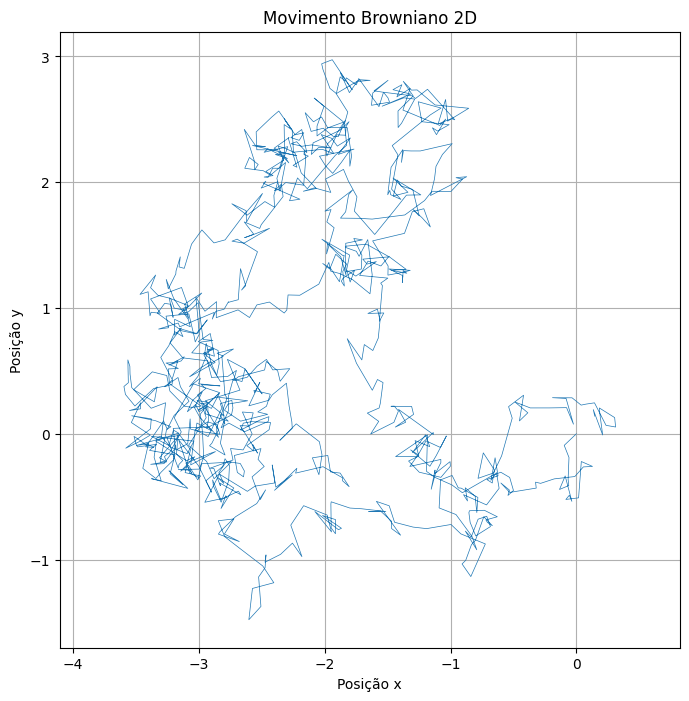

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_brownian_2D(D, T, dt):
    # Número total de passos
    N = int(T/dt)

    # Inicialização das posições (x, y)
    x = np.zeros(N)
    y = np.zeros(N)

    # Variância associada ao movimento em cada etapa
    sigma = np.sqrt(2 * D * dt)

    # Simular cada passo
    for i in range(1, N):
        # Sorteio de deslocamentos dx e dy
        dx = np.random.normal(0, sigma)
        dy = np.random.normal(0, sigma)

        # Atualização das posições
        x[i] = x[i-1] + dx
        y[i] = y[i-1] + dy

    return x, y

# Parâmetros
D = 0.5      # Coeficiente de difusão
T = 10.0      # Tempo total de simulação
dt = 0.01     # Incremento de tempo

x, y = simulate_brownian_2D(D, T, dt)

# Plot
plt.figure(figsize=(8, 8))
plt.plot(x, y, lw=0.5)
plt.title('Movimento Browniano 2D')
plt.xlabel('Posição x')
plt.ylabel('Posição y')
plt.grid(True)
plt.axis('equal')
plt.show()



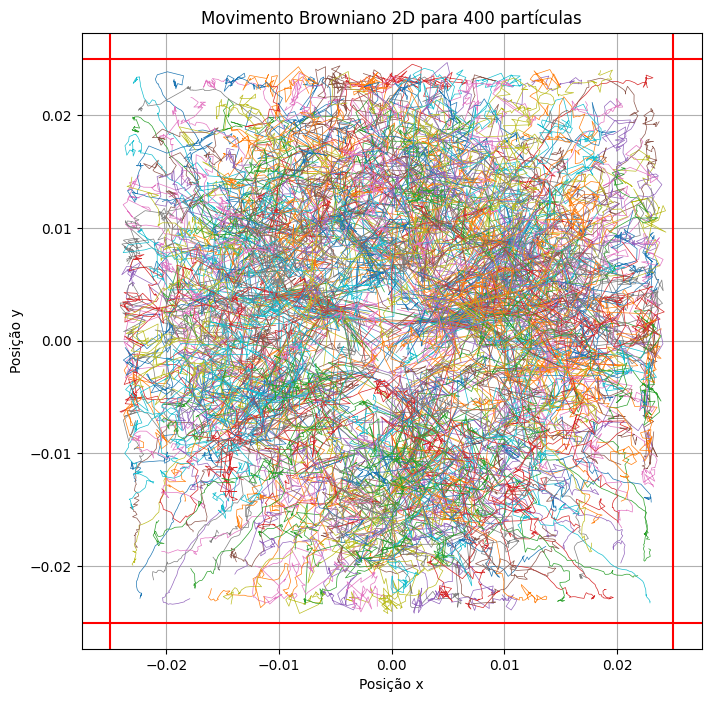

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_brownian_2D(D, T, dt, num_particles, collision_dist, barrier_limit):
    N = int(T/dt)

    # Posições iniciais para todas as partículas
    initial_sigma = collision_dist * 2.0
    x = np.random.normal(0, initial_sigma, (num_particles, N))
    y = np.random.normal(0, initial_sigma, (num_particles, N))

    # Variância associada ao movimento em cada etapa (reduzida significativamente)
    sigma = np.sqrt(2 * D * dt) / 500.0

    for i in range(1, N):
        for j in range(num_particles):
            dx = np.random.normal(0, sigma)
            dy = np.random.normal(0, sigma)

            x_proposed = x[j, i-1] + dx
            y_proposed = y[j, i-1] + dy

            # Reflexão na barreira
            # if abs(x_proposed) > barrier_limit:
            #     x_proposed = x[j, i-1] - dx
            # if abs(y_proposed) > barrier_limit:
            #     y_proposed = y[j, i-1] - dy
            # Reflexão na barreira
            # Reflexão na barreira com garantia de 'collision_dist'
            if abs(x_proposed) > barrier_limit - collision_dist:
                x_proposed = np.sign(x_proposed) * (barrier_limit - collision_dist)

            if abs(y_proposed) > barrier_limit - collision_dist:
                y_proposed = np.sign(y_proposed) * (barrier_limit - collision_dist)

            x[j, i] = x_proposed
            y[j, i] = y_proposed

            # Verificação de colisão com outras partículas
            for k in range(num_particles):
                if j != k:
                    dist = np.sqrt((x[j, i] - x[k, i])**2 + (y[j, i] - y[k, i])**2)
                    if dist < collision_dist:
                        # Repele as partículas
                        angle = np.arctan2(y[j, i] - y[k, i], x[j, i] - x[k, i])
                        x[j, i] += (collision_dist - dist) * np.cos(angle) / 2
                        y[j, i] += (collision_dist - dist) * np.sin(angle) / 2
                        x[k, i] -= (collision_dist - dist) * np.cos(angle) / 2
                        y[k, i] -= (collision_dist - dist) * np.sin(angle) / 2

    return x, y

# Parâmetros
D = 0.02
T = 1.0
dt = 0.02
num_particles = 400
collision_dist = 0.003
barrier_limit = 0.025

x, y = simulate_brownian_2D(D, T, dt, num_particles, collision_dist, barrier_limit)

plt.figure(figsize=(8, 8))
for i in range(num_particles):
    plt.plot(x[i, :], y[i, :], lw=0.5)

# Adicionando barreiras no plot
plt.axvline(barrier_limit, color='red', linestyle='-')
plt.axvline(-barrier_limit, color='red', linestyle='-')
plt.axhline(barrier_limit, color='red', linestyle='-')
plt.axhline(-barrier_limit, color='red', linestyle='-')

plt.title('Movimento Browniano 2D para {} partículas'.format(num_particles))
plt.xlabel('Posição x')
plt.ylabel('Posição y')
plt.grid(True)
plt.axis('equal')
plt.show()


In [ ]:
import imageio
import os

# Geração de GIF
filenames = []

N = int(T/dt)

# Ajustando o tamanho do ponto com base na distância de colisão
point_size = collision_dist * 10000  # Este fator pode ser ajustado conforme desejado

for i in range(N):
    fig, ax = plt.subplots(figsize=(8, 8))
    for j in range(num_particles):
        ax.scatter(x[j, i], y[j, i], s=point_size)  # Representa cada partícula como um ponto

    # Adicionando barreiras no GIF
    ax.axvline(barrier_limit, color='red', linestyle='-')
    ax.axvline(-barrier_limit, color='red', linestyle='-')
    ax.axhline(barrier_limit, color='red', linestyle='-')
    ax.axhline(-barrier_limit, color='red', linestyle='-')

    ax.set_title('Tempo: {:.2f}s'.format(i*dt))
    ax.grid(True)
    ax.axis('equal')

    # Ajustando os limites do gráfico para serem ligeiramente maiores que as barreiras
    ax.set_xlim([-barrier_limit-0.01, barrier_limit+0.01])
    ax.set_ylim([-barrier_limit-0.01, barrier_limit+0.01])

    # Salva a figura como uma imagem PNG temporária
    filename = f"temp_frame_{i}.png"
    plt.savefig(filename)
    filenames.append(filename)
    plt.close()

# Usa imageio para combinar as imagens PNG em um GIF
with imageio.get_writer('particle_movement.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.v2.imread(filename)
        writer.append_data(image)

# Remove arquivos PNG temporários
for filename in filenames:
    os.remove(filename)


# Fokker-Planck

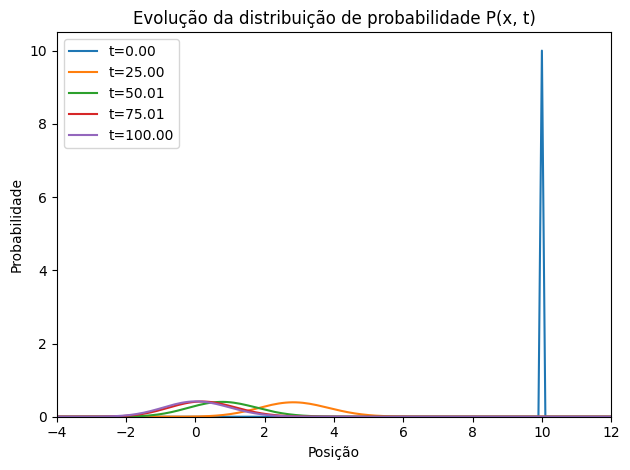

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sigma = 0.3
lambda_drag = 0.05
tmax = 100
dt = 0.01
dx = 0.1
x_range = np.arange(-20, 30, dx)  # Adjusted the range to cover the initial condition and possible spread
time = np.linspace(0, tmax, int(tmax/dt))

# Initial condition
P = np.zeros((len(x_range), len(time)))
initial_index = np.argmin(np.abs(x_range - 10))
P[initial_index, 0] = 1/dx

# Evolve the Fokker-Planck equation
for t in range(len(time)-1):
    for i in range(1, len(x_range)-1):
        advect = lambda_drag * (x_range[i+1]*P[i+1, t] - x_range[i]*P[i, t]) * dt/dx
        diffuse = (sigma**2/2) * (P[i+1, t] - 2*P[i, t] + P[i-1, t]) * dt/dx**2

        P[i, t+1] = P[i, t] + advect + diffuse

    # Zero gradient boundary conditions
    P[0, t+1] = P[1, t+1]
    P[-1, t+1] = P[-2, t+1]

# Plot the evolution
for t in [0, int(0.25*len(time)), int(0.5*len(time)), int(0.75*len(time)), -1]:
    plt.plot(x_range, P[:, t], label=f't={time[t]:.2f}')

plt.legend()
plt.title('Evolução da distribuição de probabilidade P(x, t)')
plt.xlabel('Posição')
plt.ylabel('Probabilidade')
# plt.ylim(0, 0.5)
y_max = np.max(P[10:, :])
plt.ylim(0, y_max + 0.05 * y_max)
plt.xlim(-4, 12)
plt.tight_layout()
plt.show()




In [ ]:
import os
import imageio

# Setup directory for PNGs
if not os.path.exists("histograms"):
    os.mkdir("histograms")

# Determine global x and y limits
all_values = [x for xs, _ in all_simulations for x in xs]
x_limits = (min(all_values), max(all_values))

# Create a time span with 100 points throughout tmax
n_frames = 100
time_intervals = np.linspace(0, tmax, n_frames)
# indices_to_sample = [(int(t/dt) if t != 0 else 0) for t in time_intervals]
# indices_to_sample = [(int(t/dt) - 1 if t != 0 else 0) for t in time_intervals]
max_len = max([len(xs) for xs, _ in all_simulations])
indices_to_sample = [min(int(t/dt) if t != 0 else 0, max_len-1) for t in time_intervals]

bin_edges = np.linspace(x_limits[0], x_limits[1], 101)  # 101 bin edges for 100 bins
x_range = 0.5*(bin_edges[:-1] + bin_edges[1:])  # Midpoints of bins

# Compute histograms for all time intervals first
# all_histograms = [np.histogram([xs[idx] for xs, _ in all_simulations], bins=bin_edges, density=True)[0] for idx in indices_to_sample]
all_histograms = [np.histogram([xs[min(idx, len(xs)-1)] for xs, _ in all_simulations], bins=bin_edges, density=True)[0] for idx in indices_to_sample]

max_y = max([max(hist) for hist in all_histograms]) + 0.01
y_limits = (0, max_y)

# fokker_planck_solutions[t_idx] is the Fokker-Planck solution for time_intervals[t_idx]
fokker_planck_solutions = P
fokker_planck_subsampled = fokker_planck_solutions[:, ::100]  # Pega um de cada 100 pontos

# Plot histograms and the Fokker-Planck envelope
for t_idx, t in enumerate(time_intervals):
    plt.figure(figsize=(10, 5))
    values_at_t = [xs[indices_to_sample[t_idx]] for xs, _ in all_simulations]
    plt.hist(values_at_t, bins=bin_edges, alpha=0.7, density=True, edgecolor="k", label="Langevin")
    plt.plot(x_range, fokker_planck_subsampled[t_idx], 'r-', label="Fokker-Planck", lw=2)
    plt.xlim(x_limits)
    plt.ylim(y_limits)
    plt.title(f"Distribuição da posição no tempo {t:.2f}")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"histograms/histogram_{t:.2f}.png")
    plt.close()

# Compile the images into a GIF
with imageio.get_writer('distribution_evolution.gif', mode='I', duration=0.5) as writer:
    for idx in indices_to_sample:
        t = (idx + 1) * dt
        image = imageio.v2.imread(f"histograms/histogram_{t:.2f}.png")
        writer.append_data(image)

# Deleting PNGs after the GIF is ready
for idx in indices_to_sample:
    t = (idx + 1) * dt
    os.remove(f"histograms/histogram_{t:.2f}.png")

FileNotFoundError: ignored

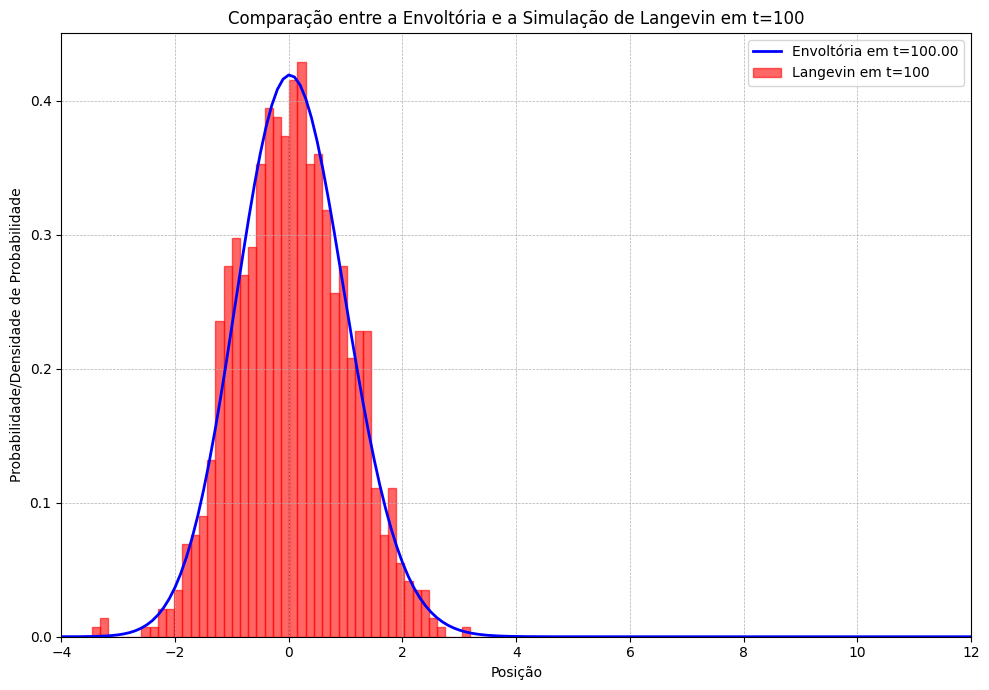

In [ ]:

bin_edges = np.linspace(x_limits[0], x_limits[1], 101)  # 101 bin edges for 100 bins
x_range = 0.5*(bin_edges[:-1] + bin_edges[1:])  # Midpoints of bins

# Histograma de Langevin em t=100
langevin_histogram_at_t100 = np.histogram([xs[-1] for xs, _ in all_simulations], bins=bin_edges, density=True)[0]

# Suponha que temos x_range_P
x_range_P = np.arange(-20, 30, 0.1) #np.linspace(-8, 12, 500)  # Exemplo; você deve substituir pelo correto se tiver

plt.figure(figsize=(10, 7))

# Plot Langevin histogram
plt.bar(x_range, langevin_histogram_at_t100, width=(x_range[1]-x_range[0]), label="Langevin em t=100", alpha=0.6, color="red", edgecolor="red")

# Superposição da evolução da distribuição de probabilidade
plt.plot(x_range_P, P[:, -1], label=f'Envoltória em t={time[-1]:.2f}', color="blue", linewidth=2)

plt.legend()
plt.title('Comparação entre a Envoltória e a Simulação de Langevin em t=100')
plt.xlabel('Posição')
plt.ylabel('Probabilidade/Densidade de Probabilidade')
y_max = max(np.max(langevin_histogram_at_t100), np.max(P[10:, -1]))
plt.ylim(0, y_max + 0.05 * y_max)
plt.xlim(-4, 12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [ ]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

# Definição das bordas e do range do eixo x
bin_edges = np.linspace(x_limits[0], x_limits[1], 101)
x_range = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Suposição de x_range_P
x_range_P = np.arange(-20, 30, 0.1)

# Lista para armazenar as imagens
images = []

# Escolha de 10 tempos igualmente espaçados
selected_times = np.linspace(0, len(time)-1, 100, dtype=int)

for t in selected_times:
    # Histograma de Langevin para o tempo selecionado
    langevin_histogram = np.histogram([xs[t] for xs, _ in all_simulations], bins=bin_edges, density=True)[0]

    fig, ax = plt.subplots(figsize=(10, 7))

    # Plot do histograma de Langevin
    ax.bar(x_range, langevin_histogram, width=(x_range[1]-x_range[0]), label=f"Langevin em t={time[t]:.2f}", alpha=0.6, color="red", edgecolor="red")

    # Superposição da distribuição de probabilidade
    ax.plot(x_range_P, P[:, t], label=f'Envoltória em t={time[t]:.2f}', color="blue", linewidth=2)

    ax.legend()
    ax.set_title(f'Comparação entre a Envoltória e a Simulação de Langevin em t={time[t]:.2f}')
    ax.set_xlabel('Posição')
    ax.set_ylabel('Probabilidade/Densidade de Probabilidade')
    # y_max = max(np.max(langevin_histogram), np.max(P[10:, t]))
    # ax.set_ylim(0, y_max + 0.05 * y_max)
    ax.set_ylim(0, 0.6)
    ax.set_xlim(-4, 12)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()

    # Salvando a imagem na lista
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    images.append(image)

    plt.close()

# Criação do GIF
imageio.mimsave('evolution.gif', images, duration=500)  # Ajuste duration para a velocidade desejada


# Limit cycles and bifurcations

## van_der_pol

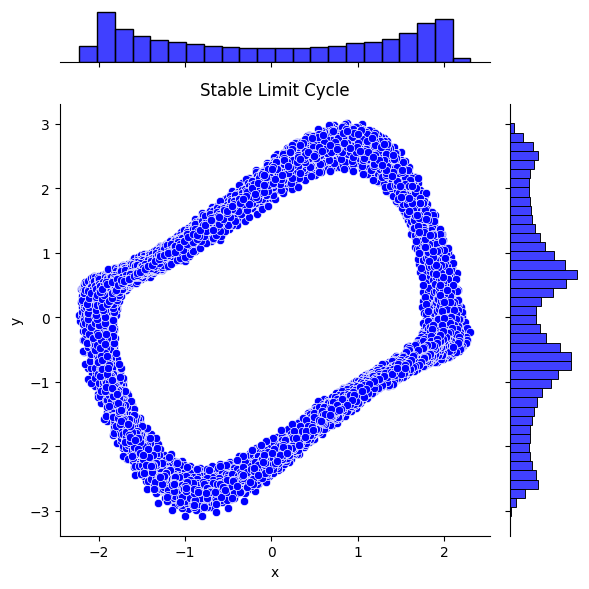

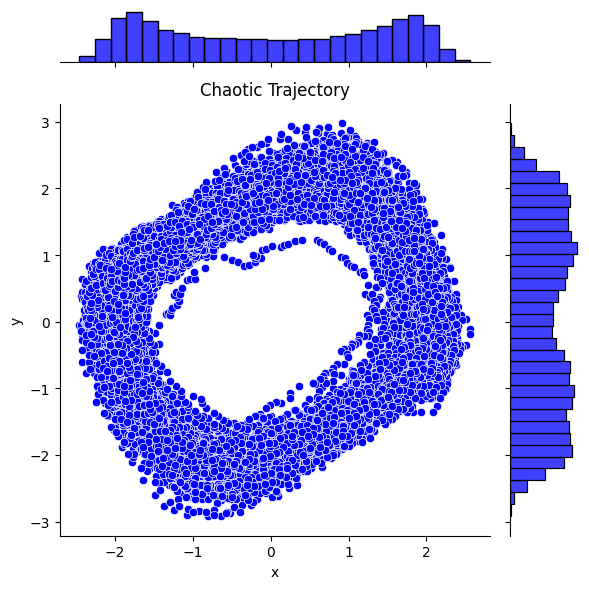

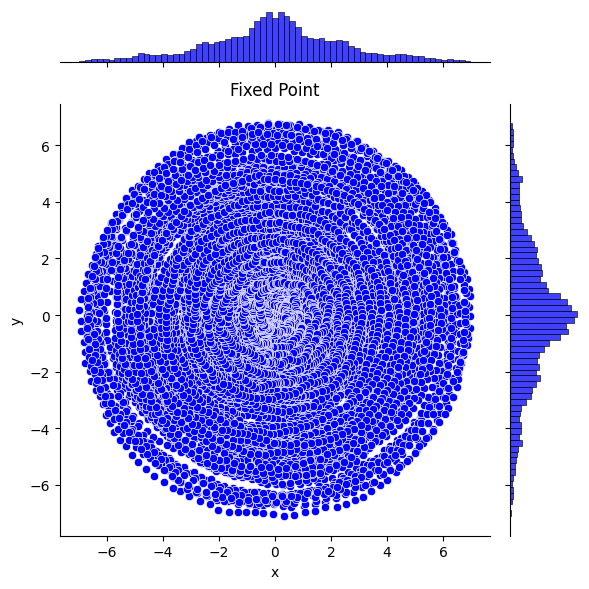

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sdeint

def van_der_pol(mu, sigma_x, sigma_y):
    def func(X, t):
        x, y = X
        dx = y
        dy = mu * (1 - x**2) * y - x
        return np.array([dx, dy])
    return func

def noise(sigma_x, sigma_y):
    def func(X, t):
        return np.diag([sigma_x, sigma_y])
    return func

def simulate(mu, sigma_x, sigma_y, T=1000, dt=0.05):
    time = np.linspace(0, T, int(T/dt))
    X0 = np.array([2.0, 0.0])

    # Obtain the specific function instances with given parameters
    f = van_der_pol(mu, sigma_x, sigma_y)
    G = noise(sigma_x, sigma_y)

    result = sdeint.itoint(f, G, X0, time)
    x = result[:, 0]
    y = result[:, 1]
    return x, y

# Parameters for the three stages
params = [
    {"mu": 1.0, "sigma_x": 0.1, "sigma_y": 0.1, "label": "Stable Limit Cycle"},
    {"mu": 0.5, "sigma_x": 0.2, "sigma_y": 0.2, "label": "Chaotic Trajectory"},
    {"mu": 0.0001, "sigma_x": 0.2, "sigma_y": 0.2, "label": "Fixed Point"}
]

# Plot
for i, p in enumerate(params):
    x, y = simulate(p["mu"], p["sigma_x"], p["sigma_y"])

    # Convert x and y to a dataframe
    data = pd.DataFrame({'x': x, 'y': y})

    # Creating the joint plot
    g = sns.jointplot(data=data, x='x', y='y', kind="scatter", color="blue")
    g.ax_joint.set_title(p["label"])
    g.ax_joint.set_xlabel('x')
    g.ax_joint.set_ylabel('y')
    plt.tight_layout()
    plt.show()

## fitzhugh_nagumo

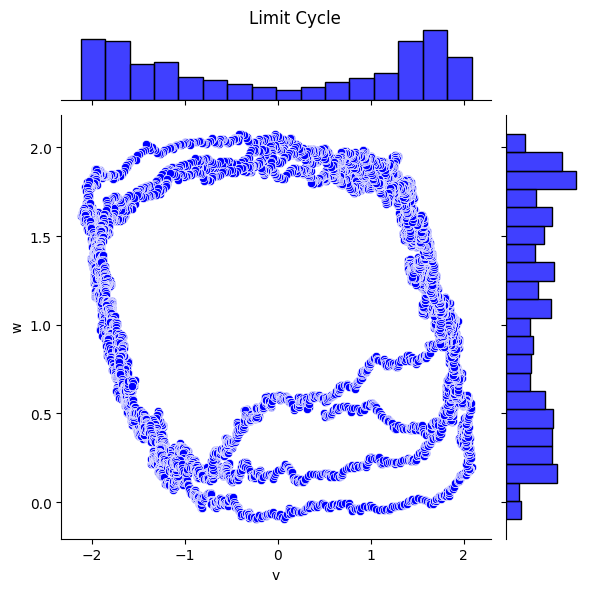

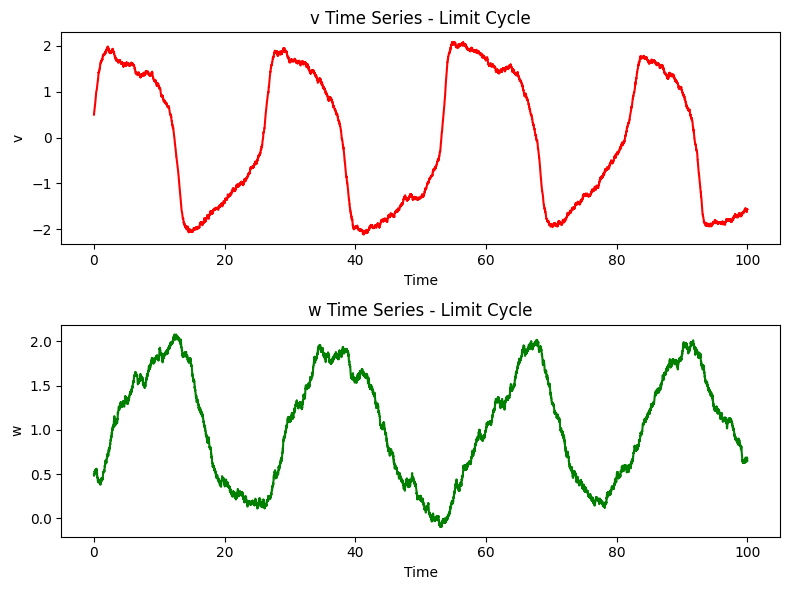

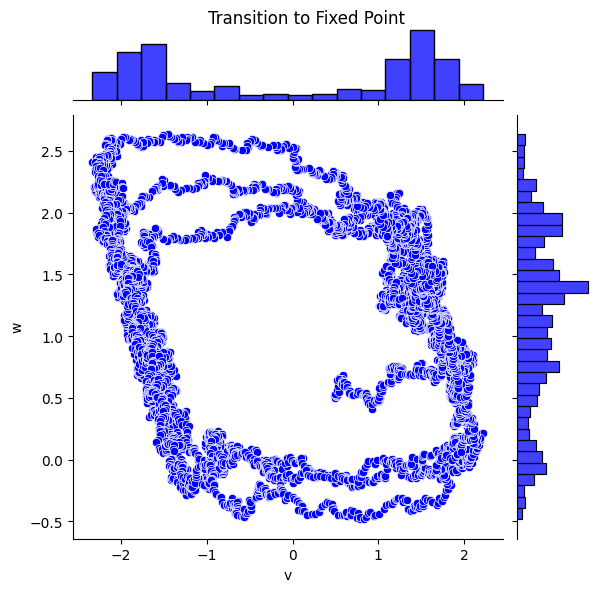

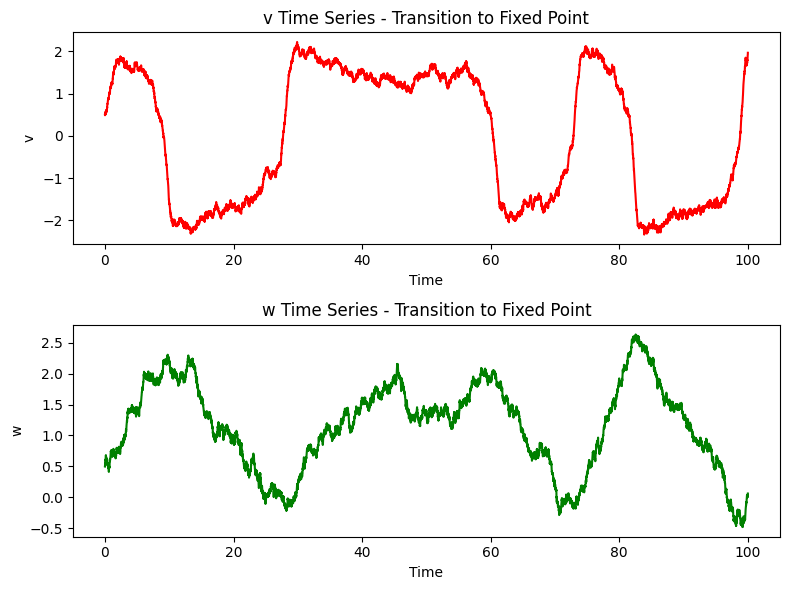

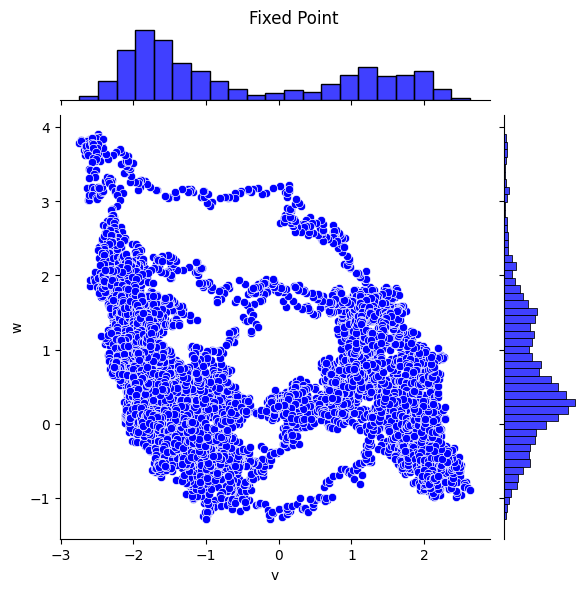

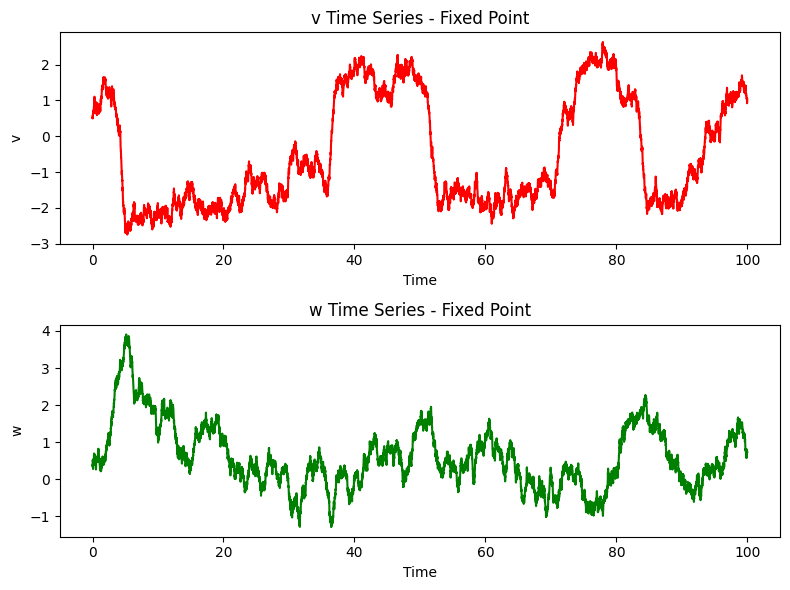

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sdeint

# FitzHugh-Nagumo dynamics with noise
def fitzhugh_nagumo(I, epsilon, a, b, sigma_v, sigma_w):
    def func(X, t):
        v, w = X
        dv = v - (v**3)/3 - w + I
        dw = epsilon * (v + a - b * w)
        return np.array([dv, dw])
    return func

def noise(sigma_v, sigma_w):
    def func(X, t):
        return np.diag([sigma_v, sigma_w])
    return func

def simulate(I, epsilon, a, b, sigma_v, sigma_w, T=100, dt=0.01):
    time = np.linspace(0, T, int(T/dt))
    X0 = np.array([0.5, 0.5])

    # Obtain the specific function instances with given parameters
    f = fitzhugh_nagumo(I, epsilon, a, b, sigma_v, sigma_w)
    G = noise(sigma_v, sigma_w)

    result = sdeint.itoint(f, G, X0, time)
    v = result[:, 0]
    w = result[:, 1]
    return v, w, time

# Parameters for the three scenarios
params = [
    {"I": 1.0, "epsilon": 0.1, "a": 0.5, "b": 0.5, "sigma_v": 0.1, "sigma_w": 0.1, "label": "Limit Cycle"},
    {"I": 1.0, "epsilon": 0.1, "a": 0.5, "b": 0.5, "sigma_v": 0.2, "sigma_w": 0.2, "label": "Transition to Fixed Point"},
    {"I": 0.5, "epsilon": 0.1, "a": 0.5, "b": 0.5, "sigma_v": 0.5, "sigma_w": 0.5, "label": "Fixed Point"}
]

# Plot
for i, p in enumerate(params):
    v, w, time = simulate(p["I"], p["epsilon"], p["a"], p["b"], p["sigma_v"], p["sigma_w"])

    # Convert v and w to a dataframe
    data = pd.DataFrame({'v': v, 'w': w, 'time': time})

    # Creating the joint plot
    g = sns.jointplot(data=data, x='v', y='w', kind="scatter", color="blue")
    plt.subplots_adjust(top=0.95)
    g.fig.suptitle(p["label"])
    g.ax_joint.set_xlabel('v')
    g.ax_joint.set_ylabel('w')

    # Plotting time series for v and w
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

    sns.lineplot(data=data, x='time', y='v', ax=axes[0], color="red")
    axes[0].set_title(f'v Time Series - {p["label"]}')
    axes[0].set_xlabel('Time')
    axes[0].set_ylabel('v')

    sns.lineplot(data=data, x='time', y='w', ax=axes[1], color="green")
    axes[1].set_title(f'w Time Series - {p["label"]}')
    axes[1].set_xlabel('Time')
    axes[1].set_ylabel('w')

    plt.tight_layout()
    plt.show()


## ipywidgets

I=widgets.FloatSlider(min=0, max=2, step=0.1, value=2),
                   epsilon=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.66),
                   a=widgets.FloatSlider(min=0, max=2, step=0.1, value=1.7),
                   b=widgets.FloatSlider(min=0, max=2, step=0.1, value=1.7),
                   sigma_v=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.17),
                   sigma_w=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.22))

In [ ]:
%load_ext ipywidgets

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sdeint
import ipywidgets as widgets
from IPython.display import display, clear_output

# FitzHugh-Nagumo dynamics with noise
def fitzhugh_nagumo(I, epsilon, a, b, sigma_v, sigma_w):
    def func(X, t):
        v, w = X
        dv = v - (v**3)/3 - w + I
        dw = epsilon * (v + a - b * w)
        return np.array([dv, dw])
    return func

def noise(sigma_v, sigma_w):
    def func(X, t):
        return np.diag([sigma_v, sigma_w])
    return func

def simulate(I, epsilon, a, b, sigma_v, sigma_w, T=100, dt=0.01):
    time = np.linspace(0, T, int(T/dt))
    X0 = np.array([0.5, 0.5])*2

    f = fitzhugh_nagumo(I, epsilon, a, b, sigma_v, sigma_w)
    G = noise(sigma_v, sigma_w)

    result = sdeint.itoint(f, G, X0, time)
    v = result[:, 0]
    w = result[:, 1]
    return v, w, time

def plot_simulation(I=1.0, epsilon=0.1, a=0.5, b=0.5, sigma_v=0.1, sigma_w=0.1):
    v, w, time = simulate(I, epsilon, a, b, sigma_v, sigma_w)

    data = pd.DataFrame({'v': v, 'w': w, 'time': time})

    # Joint plot for v vs w
    g = sns.jointplot(data=data, x='v', y='w', kind="scatter", color="blue")
    g.fig.suptitle('Phase Plot with Histograms')

    # Time series plot for v and w
    plt.figure(figsize=(12, 5))
    plt.plot(data['time'], data['v'], label='v', color='red')
    plt.plot(data['time'], data['w'], label='w', color='green')
    plt.title('Time Series')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Interactive Widgets
widgets.interactive(plot_simulation,
                   I=widgets.FloatSlider(min=0, max=2, step=0.1, value=0.2),
                   epsilon=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.48),
                   a=widgets.FloatSlider(min=0, max=2, step=0.1, value=0.5),
                   b=widgets.FloatSlider(min=0, max=2, step=0.1, value=0.6),
                   sigma_v=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.04),
                   sigma_w=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.05))


interactive(children=(FloatSlider(value=0.2, description='I', max=2.0), FloatSlider(value=0.48, description='e…

## hopf_bifurcation

In [ ]:
%load_ext ipywidgets

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sdeint
import ipywidgets as widgets
from IPython.display import display, clear_output

# Hopf Bifurcation dynamics with noise
def hopf_bifurcation(mu, sigma_x, sigma_y):
    def func(X, t):
        x, y = X
        dx = mu*x - y - x*(x**2 + y**2)
        dy = x + mu*y - y*(x**2 + y**2)
        return np.array([dx, dy])
    return func

def noise(sigma_x, sigma_y):
    def func(X, t):
        return np.diag([sigma_x, sigma_y])
    return func

def simulate(mu, sigma_x, sigma_y, T=100, dt=0.01):
    time = np.linspace(0, T, int(T/dt))
    X0 = np.array([0.5, 0.5])

    f = hopf_bifurcation(mu, sigma_x, sigma_y)
    G = noise(sigma_x, sigma_y)

    result = sdeint.itoint(f, G, X0, time)
    x = result[:, 0]
    y = result[:, 1]
    return x, y, time

# def density_estimation_phase_space(x, y, bins=30):
#     # Using 2D histogram to estimate density
#     H, xedges, yedges = np.histogram2d(x, y, bins=bins)

#     # Using the bin centers as the x and y values
#     x_centers = 0.5 * (xedges[:-1] + xedges[1:])
#     y_centers = 0.5 * (yedges[:-1] + yedges[1:])

#     return H, x_centers, y_centers

# from scipy.signal import welch

# def compute_psd(time_series, dt=0.01):
#     frequencies, psd = welch(time_series, fs=1/dt)
#     return frequencies, psd

# from scipy.signal import spectrogram

# def plot_spectrogram(x, fs, ax):
#     """
#     Plots a spectrogram for a time series.
#     x: time series data
#     fs: sample rate (1/dt from your simulation)
#     ax: the axis to plot on
#     """
#     f, t, Sxx = spectrogram(x, fs)
#     ax.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
#     ax.set_ylabel('Frequency [Hz]')
#     ax.set_xlabel('Time [s]')

def plot_simulation(mu=0.0, sigma_x=0.1, sigma_y=0.1):
    x, y, time = simulate(mu, sigma_x, sigma_y)

    data = pd.DataFrame({'x': x, 'y': y, 'time': time})

    # Joint plot for x vs y
    g = sns.jointplot(data=data, x='x', y='y', kind="scatter", color="blue", marginal_kws=dict(bins=20))
    plt.subplots_adjust(top=0.90)
    g.fig.suptitle('Phase Plot with Histograms')

    xmin, ymin = -1.5, -1.5
    xmax, ymax = 1.5, 1.5

    # Setting the x and y limits for the main joint plot
    g.ax_joint.set_xlim([xmin, xmax])
    g.ax_joint.set_ylim([ymin, ymax])

    # Optionally, you can also set the limits for the marginal histograms (or KDEs) on the top and right
    g.ax_marg_x.set_xlim([xmin, xmax])
    g.ax_marg_y.set_ylim([ymin, ymax])

    # Time series plot for x and y
    plt.figure(figsize=(12, 5))
    plt.plot(data['time'], data['x'], label='x', color='red')
    plt.plot(data['time'], data['y'], label='y', color='green')
    plt.title('Time Series')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # # Density Estimation and Visualization as Heatmap
    # H, x_centers, y_centers = density_estimation_phase_space(x, y)
    # plt.figure(figsize=(10, 7))
    # plt.pcolormesh(x_centers, y_centers, H.T, shading='auto')  # Transpose H to match the axis
    # plt.colorbar(label='Density')
    # plt.title('Adapted PSD in Phase Space')
    # plt.xlabel('x')
    # plt.ylabel('y')
    # plt.show()

    # # Compute and Plot PSD for x and y time series
    # freq_x, psd_x = compute_psd(x)
    # freq_y, psd_y = compute_psd(y)

    # plt.figure(figsize=(12, 5))
    # plt.loglog(freq_x, psd_x, label='PSD of x', color='red')
    # plt.loglog(freq_y, psd_y, label='PSD of y', color='green')
    # plt.title('Power Spectral Density of Time Series')
    # plt.xlabel('Frequency')
    # plt.ylabel('Power')
    # plt.legend()
    # plt.grid(which='both')
    # plt.tight_layout()
    # plt.show()

    # fig, axs = plt.subplots(2, 1, figsize=(12, 10))

    # # Spectrogram for x
    # plot_spectrogram(x, 1/0.01, axs[0])  # assuming dt=0.01
    # axs[0].set_title('Spectrogram of x')

    # # Spectrogram for y
    # plot_spectrogram(y, 1/0.01, axs[1])  # assuming dt=0.01
    # axs[1].set_title('Spectrogram of y')

    # plt.tight_layout()
    # plt.show()


# Interactive Widgets
widgets.interactive(plot_simulation,
                   mu=widgets.FloatSlider(min=-2, max=2, step=0.1, value=0.6),
                   sigma_x=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.04),
                   sigma_y=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.05))


The ipywidgets extension is already loaded. To reload it, use:
  %reload_ext ipywidgets


interactive(children=(FloatSlider(value=0.6, description='mu', max=2.0, min=-2.0), FloatSlider(value=0.04, des…

In [ ]:
%load_ext ipywidgets

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sdeint
import ipywidgets as widgets
from IPython.display import display, clear_output

# Hopf Bifurcation dynamics with noise
def hopf_bifurcation(mu, sigma_x, sigma_y):
    def func(X, t):
        x, y = X
        dx = mu*x - y - x*(x**2 + y**2)
        dy = x + mu*y - y*(x**2 + y**2)
        return np.array([dx, dy])
    return func

def noise(sigma_x, sigma_y):
    def func(X, t):
        return np.diag([sigma_x, sigma_y])
    return func

def simulate(mu, sigma_x, sigma_y, T=100, dt=0.01):
    time = np.linspace(0, T, int(T/dt))
    X0 = np.array([0.0, 1.0])

    f = hopf_bifurcation(mu, sigma_x, sigma_y)
    G = noise(sigma_x, sigma_y)

    result = sdeint.itoint(f, G, X0, time)
    x = result[:, 0]
    y = result[:, 1]
    return x, y, time

def plot_simulation_with_vector_field(mu=0.0, sigma_x=0.1, sigma_y=0.1):
    # Simulate the system to get trajectory
    x, y, time = simulate(mu, sigma_x, sigma_y)

    data = pd.DataFrame({'x': x, 'y': y, 'time': time})

    # Create grid for vector field
    X, Y = np.meshgrid(np.linspace(-1, 1, 40), np.linspace(-1, 1, 40))
    DX = mu*X - Y - X*(X**2 + Y**2)
    DY = X + mu*Y - Y*(X**2 + Y**2)
    magnitude = np.sqrt(DX**2 + DY**2)
    DX /= magnitude
    DY /= magnitude

    # Plot vector field
    plt.figure(figsize=(10, 8))
    plt.quiver(X, Y, DX, DY, angles='xy', scale_units='xy', scale=20, alpha=0.6, color='grey')

    # Plot trajectory from simulation
    plt.plot(x, y, 'b-', linewidth=2, alpha=0.6)  # Trajectory as a blue line
    plt.plot(x[0], y[0], 'ro')  # Starting point as a red dot

    plt.title('Vector Field with Trajectory')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Time series plot for x and y
    plt.figure(figsize=(12, 5))
    plt.plot(data['time'], data['x'], label='x', color='red')
    plt.plot(data['time'], data['y'], label='y', color='green')
    plt.title('Time Series')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Interactive Widgets
widgets.interactive(plot_simulation_with_vector_field,
                   mu=widgets.FloatSlider(min=-2, max=2, step=0.1, value=0.2),
                   sigma_x=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.04),
                   sigma_y=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.05))


The ipywidgets extension is already loaded. To reload it, use:
  %reload_ext ipywidgets


interactive(children=(FloatSlider(value=0.2, description='mu', max=2.0, min=-2.0), FloatSlider(value=0.04, des…

In [ ]:
%load_ext ipywidgets

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sdeint
import ipywidgets as widgets
from IPython.display import display, clear_output

def hopf_bifurcation_polar(mu):
    def func(R, t):
        r, theta = R
        dr = mu*r - r**3
        dtheta = 1
        return np.array([dr, dtheta])
    return func

def noise_polar(sigma_r, sigma_theta):
    def func(R, t):
        return np.diag([sigma_r, sigma_theta])
    return func

def simulate(mu, sigma_r, sigma_theta, T=100, dt=0.01):
    time = np.linspace(0, T, int(T/dt))
    R0 = np.array([1.0, 0.0])

    f = hopf_bifurcation_polar(mu)
    G = noise_polar(sigma_r, sigma_theta)

    result = sdeint.itoint(f, G, R0, time)
    r = result[:, 0]
    theta = result[:, 1]
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y, time

def plot_simulation_with_vector_field(mu=0.0, sigma_r=0.1, sigma_theta=0.1):
    # Simulate the system to get trajectory in polar coordinates
    x, y, time = simulate_polar(mu, sigma_r, sigma_theta)

    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)

    data = pd.DataFrame({'r': r, 'theta': theta, 'time': time})

    # Create grid for vector field in polar coordinates
    R, Theta = np.meshgrid(np.linspace(0, 1.5, 40), np.linspace(0, 2*np.pi, 40))
    DR = mu*R - R**3
    DTheta = np.ones_like(R)

    # Plot vector field in polar coordinates
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 8))
    ax.quiver(Theta, R, DTheta, DR, angles='uv', scale_units='xy', scale=20, alpha=0.6, color='grey')

    # Plot trajectory from simulation
    ax.plot(theta, r, 'b-', linewidth=2, alpha=0.6)
    ax.plot(theta[0], r[0], 'ro')
    ax.set_title('Vector Field with Trajectory in Polar Coordinates')
    plt.show()

    # Time series plot for r and theta
    plt.figure(figsize=(12, 5))
    plt.plot(data['time'], data['r'], label='r', color='red')
    plt.plot(data['time'], data['theta'], label='theta', color='green')
    plt.title('Time Series in Polar Coordinates')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.tight_layout()
    plt.show()


# Interactive Widgets
widgets.interactive(plot_simulation_with_vector_field,
                   mu=widgets.FloatSlider(min=-2, max=2, step=0.1, value=0.2),
                   sigma_x=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.04),
                   sigma_y=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.05))

The ipywidgets extension is already loaded. To reload it, use:
  %reload_ext ipywidgets


interactive(children=(FloatSlider(value=0.2, description='mu', max=2.0, min=-2.0), FloatSlider(value=0.1, desc…